# 1. Libraries Import

In [146]:
# ========================================================
# = Libraries import
# ========================================================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import pvlib

In [147]:
FONT_SIZE = 14
rc={'font.size': FONT_SIZE, 'axes.labelsize': FONT_SIZE, 'legend.fontsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE, 'xtick.labelsize': FONT_SIZE, 'ytick.labelsize': FONT_SIZE}
plt.rcParams.update(**rc)
plt.rc('font', weight='bold')

# style = 'ggplot' # choose a style from the above options
# plt.style.use(style)

# 2 Parameter Settings

In [148]:
# When working with MONITORS, we determine a time period:
time_start = '2022-07-30'
time_end = '2023-07-30'

# set measure name we concern
measure_name_list = ['Inv.DC.P.W', 'Inv.DC.U.V', 'Inv.DC.I.A', 'Gen.W', 'Inv.AC.U.V', 'Inv.AC.I.A', 'Inv.AC.Freq.Hz']
name_list = ['DC Power (Watt)', 'DC Voltage(V)', 'DC Current(A)', 'AC Power (Watt)', 'AC Voltage(V)', 'AC Current(A)', 'AC Frequency (Hz)']

# 3 Read Data

## 3.1 Read Meta Data Table

In [ ]:
# raw meta data
df_sites = pd.read_csv('../input_data/SITE_nodeType_20230630.csv')
df_monitors = pd.read_csv('../input_data/MNTR_ddb_20230630.csv')
df_monitors.head()

## 3.2 Read Fimer Monitors

In [150]:
# to check the missing data
time_index5min = pd.date_range(start=pd.to_datetime(time_start), end=pd.to_datetime(time_end), freq='5min').tz_localize(None)
time_index5min


DatetimeIndex(['2022-07-30 00:00:00', '2022-07-30 00:05:00',
               '2022-07-30 00:10:00', '2022-07-30 00:15:00',
               '2022-07-30 00:20:00', '2022-07-30 00:25:00',
               '2022-07-30 00:30:00', '2022-07-30 00:35:00',
               '2022-07-30 00:40:00', '2022-07-30 00:45:00',
               ...
               '2023-07-29 23:15:00', '2023-07-29 23:20:00',
               '2023-07-29 23:25:00', '2023-07-29 23:30:00',
               '2023-07-29 23:35:00', '2023-07-29 23:40:00',
               '2023-07-29 23:45:00', '2023-07-29 23:50:00',
               '2023-07-29 23:55:00', '2023-07-30 00:00:00'],
              dtype='datetime64[ns]', length=105121, freq='5T')

In [151]:
df_fimer = pd.read_csv('../preprocessed_data/monitors_DCdata/FIMER_20231019.csv')
df_fimer = df_fimer[(df_fimer['time']>=time_start) & (df_fimer['time']<=time_end)]
df_fimer.index = np.arange(len(df_fimer))
df_fimer.head()

time  Inv.AC.U.V:MNTR|22179934  Inv.AC.I.A:MNTR|22179934  \
0  2022-07-30 00:00:00                     252.0                       0.0   
1  2022-07-30 00:05:00                     252.0                       0.0   
2  2022-07-30 00:10:00                     252.0                       0.0   
3  2022-07-30 00:15:00                     252.0                       0.0   
4  2022-07-30 00:20:00                     252.0                       0.0   

   Gen.W:MNTR|22179934  Inv.AC.Freq.Hz:MNTR|22179934  \
0                  0.0                          50.0   
1                  0.0                          50.0   
2                  0.0                          50.0   
3                  0.0                          50.0   
4                  0.0                          50.0   

   Inv.DC.U.V:MNTR|22179934  Inv.DC.P.W:MNTR|22179934  \
0                     293.0                       0.0   
1                     293.0                       0.0   
2                     293.0                       0.0   
3                     293.0                       0.0   
4                     293.0                       0.0   

   Inv.AC.U.V:MNTR|8937329  Inv.AC.I.A:MNTR|8937329  Gen.W:MNTR|8937329  ...  \
0                    249.0                      0.0                 0.0  ...   
1                    249.0                      0.0                 0.0  ...   
2                    249.0                      0.0                 0.0  ...   
3                    249.0                      0.0                 0.0  ...   
4                    249.0                      0.0                 0.0  ...   

   Gen.W:MNTR|22131936  Inv.AC.Freq.Hz:MNTR|22131936  \
0                  0.0                          50.0   
1                  0.0                          50.0   
2                  0.0                          50.0   
3                  0.0                          50.0   
4                  0.0                          50.0   

   Inv.DC.U.V:MNTR|22131936  Inv.DC.P.W:MNTR|22131936  \
0                     526.0                     268.0   
1                     526.0                     268.0   
2                     526.0                     268.0   
3                     526.0                     268.0   
4                     526.0                     268.0   

   Inv.AC.U.V:MNTR|22243104  Inv.AC.I.A:MNTR|22243104  Gen.W:MNTR|22243104  \
0                     246.0                       0.0                  0.0   
1                     246.0                       0.0                  0.0   
2                     246.0                       0.0                  0.0   
3                     246.0                       0.0                  0.0   
4                     246.0                       0.0                  0.0   

   Inv.AC.Freq.Hz:MNTR|22243104  Inv.DC.U.V:MNTR|22243104  \
0                          50.0                     296.0   
1                          50.0                     296.0   
2                          50.0                     296.0   
3                          50.0                     296.0   
4                          50.0                     296.0   

   Inv.DC.P.W:MNTR|22243104  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 163 columns]

# 4 A Single Monitor: read raw data & preprocessing outliers and missing data

## 4.1 Meta Data

In [152]:

# MID = '22179934'
MID = '22135464' # shading 
# MID = '25554765' # DC side clipping
# MID = '1344416'
# MID = '22228666' # 22228666 (left) || 22228583
# MID = 'JNGL-I2PF-KMWN-XA64' # shading
# MID = '23119233'
# MID = '25546391'
# MID = '22228583' # shading
# MID = '1344496' # open-circut

site_id = df_monitors.loc[df_monitors['source']== str('MNTR|' + MID), 'siteId'].iloc[0]
time_zone = df_sites.loc[df_sites['source']==site_id, 'timezone'].values[0]
latitude = float(df_monitors.loc[df_monitors['source']==str('MNTR|' + MID), 'latitude'].values[0][1:])
longitude = float(df_monitors.loc[df_monitors['source']==str('MNTR|' + MID), 'longitude'].values[0])
pv_size = df_monitors.loc[df_monitors['source']== str('MNTR|' + MID), 'pvSizeWatt'].values[0]
site_id

'SITE|38fd6ac7-3984-41bb-933e-43a742ec7525'

In [153]:
# From email convo from owner
tilt = 10
azimuth = 50
loss_factor = 0.85

## 4.2 Read Raw Data

In [154]:
df = df_fimer.filter(like=MID, axis=1)
split_columns = df.columns.str.split(':').str[0]
df.columns = split_columns
df.insert(0, 'time',df_fimer['time'])
df.fillna(0, inplace=True)
df.head()


time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0  2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1  2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2  2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3  2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4  2022-07-30 00:20:00       418.0         1.0    0.0            50.0   

   Inv.DC.U.V  Inv.DC.P.W  
0       265.0        48.0  
1       265.0        48.0  
2       265.0        48.0  
3       265.0        48.0  
4       265.0        48.0

In [155]:
metrics_list = df.columns.to_list()[1:]
metrics_list

['Inv.AC.U.V',
 'Inv.AC.I.A',
 'Gen.W',
 'Inv.AC.Freq.Hz',
 'Inv.DC.U.V',
 'Inv.DC.P.W']

In [156]:
fig = px.line(df, x='time', y=metrics_list[2], title=metrics_list[2])
fig.show()

In [157]:
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.minute
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date
df['date'] = df['date'].astype(pd.StringDtype())

df.head()

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0 2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1 2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2 2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3 2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4 2022-07-30 00:20:00       418.0         1.0    0.0            50.0   

   Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  
0       265.0        48.0       0     0  2022-07-30  
1       265.0        48.0       5     0  2022-07-30  
2       265.0        48.0      10     0  2022-07-30  
3       265.0        48.0      15     0  2022-07-30  
4       265.0        48.0      20     0  2022-07-30

<Axes: xlabel='time'>

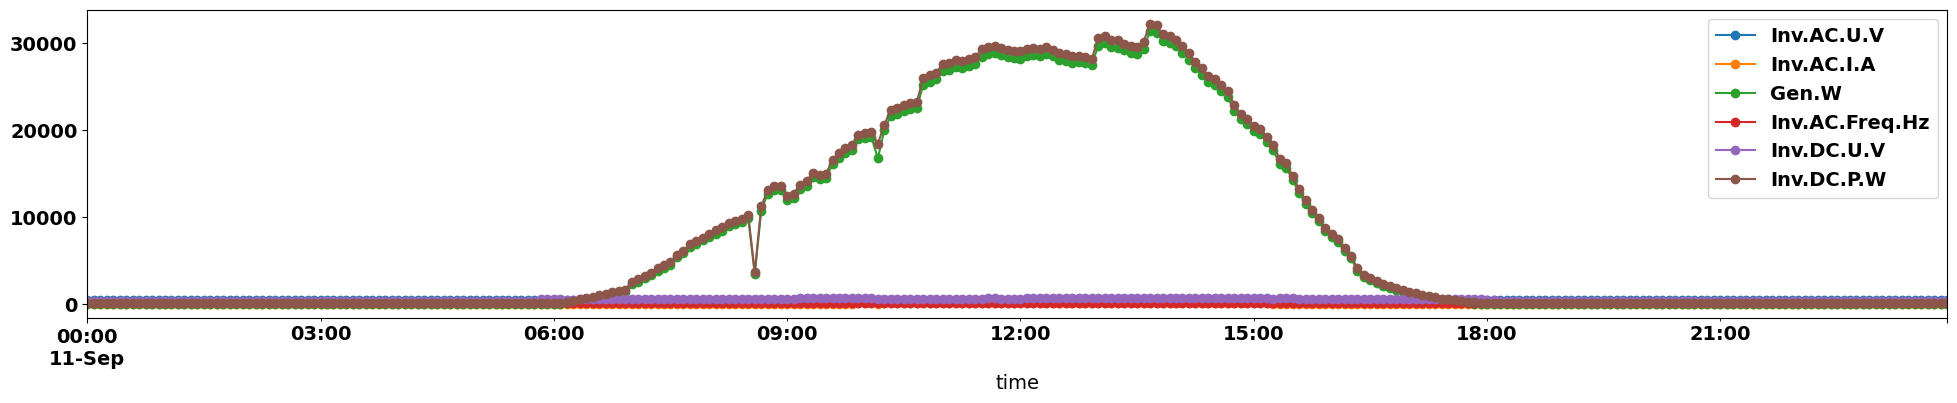

In [158]:
df.loc[df['date']=='2022-09-11', ['time'] + metrics_list].set_index('time').plot(figsize=(24,4), marker='o')

## 4.3. Calculate the theoretical generation of a cleark-sky day

In [159]:
from pvlib import irradiance
from pvlib import location

In [160]:
def get_irradiance(loc, times, tilt, surface_azimuth):
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = loc.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = loc.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})

In [161]:
time_index5min_local = pd.date_range(start=pd.to_datetime(time_start).tz_localize(time_zone), end=pd.to_datetime(time_end).tz_localize(time_zone), freq='5min')
time_index5min_local = time_index5min_local[0:-1]

loc = location.Location(latitude, longitude, tz=time_zone)
pvlib_irr = get_irradiance(loc, time_index5min_local, tilt, azimuth)
pvlib_irr = pvlib_irr*pv_size*loss_factor/1000
# pvlib_irr.index = pvlib_irr.index.tz_localize(None)
pvlib_irr['time'] = pvlib_irr.index.tz_localize(None)
pvlib_irr = pvlib_irr[~pvlib_irr.index.duplicated(keep='first')]
pvlib_irr

GHI  POA                time
2022-07-30 00:00:00+10:00  0.0  0.0 2022-07-30 00:00:00
2022-07-30 00:05:00+10:00  0.0  0.0 2022-07-30 00:05:00
2022-07-30 00:10:00+10:00  0.0  0.0 2022-07-30 00:10:00
2022-07-30 00:15:00+10:00  0.0  0.0 2022-07-30 00:15:00
2022-07-30 00:20:00+10:00  0.0  0.0 2022-07-30 00:20:00
...                        ...  ...                 ...
2023-07-29 23:35:00+10:00  0.0  0.0 2023-07-29 23:35:00
2023-07-29 23:40:00+10:00  0.0  0.0 2023-07-29 23:40:00
2023-07-29 23:45:00+10:00  0.0  0.0 2023-07-29 23:45:00
2023-07-29 23:50:00+10:00  0.0  0.0 2023-07-29 23:50:00
2023-07-29 23:55:00+10:00  0.0  0.0 2023-07-29 23:55:00

[105120 rows x 3 columns]

In [162]:
# Ensure that both 'time' columns have the same format and data type
df['time'] = pd.to_datetime(df['time'])
pvlib_irr['time'] = pd.to_datetime(pvlib_irr['time'])
pvlib_irr = pvlib_irr.drop_duplicates(subset='time')

# Now, you can map the values
df['theoretical generation.W'] = df['time'].map(pvlib_irr.set_index('time')['POA'])
df

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0      2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1      2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2      2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3      2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4      2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                    ...         ...         ...    ...             ...   
105115 2023-07-29 23:35:00       417.0         2.0    0.0            50.0   
105116 2023-07-29 23:40:00       417.0         2.0    0.0            50.0   
105117 2023-07-29 23:45:00       417.0         2.0    0.0            50.0   
105118 2023-07-29 23:50:00       417.0         2.0    0.0            50.0   
105119 2023-07-29 23:55:00       417.0         2.0    0.0            50.0   

        Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0            265.0        48.0       0     0  2022-07-30   
1            265.0        48.0       5     0  2022-07-30   
2            265.0        48.0      10     0  2022-07-30   
3            265.0        48.0      15     0  2022-07-30   
4            265.0        48.0      20     0  2022-07-30   
...            ...         ...     ...   ...         ...   
105115       284.0        34.0      35    23  2023-07-29   
105116       284.0        34.0      40    23  2023-07-29   
105117       284.0        34.0      45    23  2023-07-29   
105118       284.0        34.0      50    23  2023-07-29   
105119       284.0        34.0      55    23  2023-07-29   

        theoretical generation.W  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
105115                       0.0  
105116                       0.0  
105117                       0.0  
105118                       0.0  
105119                       0.0  

[105120 rows x 11 columns]

<Axes: xlabel='time'>

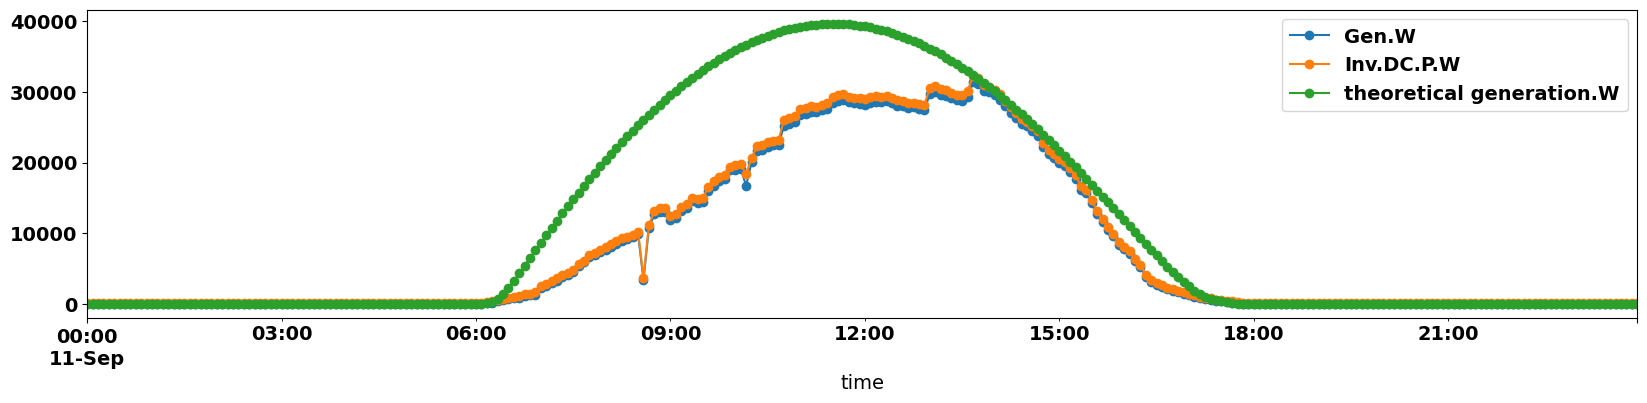

In [163]:
df[df['date']=='2022-09-11'].set_index('time')[['Gen.W', 'Inv.DC.P.W', 'theoretical generation.W']].plot(figsize=(20, 4), marker='o')

## 4.4. Find daytime: sunrise & sunset

In [164]:
# ======================================================================================
# = calculate the sunrise and sunset time based on the latitude and longitude
# ======================================================================================
def find_sunrise_set(df, time_index5min_local, latitude, longitude):
    # calculate the sunrise and sunset time
    df_sunrise_set = pvlib.solarposition.sun_rise_set_transit_spa(times=time_index5min_local, latitude=latitude, longitude=longitude)
    df_sunrise_set['rise_hour'] = df_sunrise_set['sunrise'] + pd.Timedelta(hours=1)
    df_sunrise_set['rise_hour'] = df_sunrise_set['rise_hour'].dt.tz_localize(None)
    df_sunrise_set['set_hour'] = df_sunrise_set['sunset'] - pd.Timedelta(hours=1)#df_sunrise_set['sunset'].dt.hour
    df_sunrise_set['set_hour'] = df_sunrise_set['set_hour'].dt.tz_localize(None)
    df_sunrise_set['time'] = time_index5min_local
    # Assuming df_sunrise_set is your DataFrame
    df_sunrise_set['time'] = df_sunrise_set['time'].dt.tz_localize(None)
    df_sunrise_set['time'] = pd.to_datetime(df_sunrise_set['time'])
    df_sunrise_set = df_sunrise_set.drop_duplicates(subset='time')
    # comparison_column = (df_sunrise_set["time"] >= df_sunrise_set['rise_hour']) & (df_sunrise_set["time"] <= df_sunrise_set['set_hour'])
    comparison_column = np.where((df_sunrise_set["time"] >=df_sunrise_set['rise_hour']) & (df_sunrise_set["time"] <=df_sunrise_set['set_hour']), True, False)
    df_sunrise_set['comparision'] = comparison_column
    df['sunrise_time_1h'] = df['time'].map(df_sunrise_set.set_index('time')['rise_hour'])
    df['sunset_time_1h'] = df['time'].map(df_sunrise_set.set_index('time')['set_hour'])
    df['during_sunrise_set'] = df['time'].map(df_sunrise_set.set_index('time')['comparision'])
    return df
   

In [165]:
df = find_sunrise_set(df=df, time_index5min_local=time_index5min_local, latitude=latitude, longitude=longitude)
df

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0      2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1      2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2      2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3      2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4      2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                    ...         ...         ...    ...             ...   
105115 2023-07-29 23:35:00       417.0         2.0    0.0            50.0   
105116 2023-07-29 23:40:00       417.0         2.0    0.0            50.0   
105117 2023-07-29 23:45:00       417.0         2.0    0.0            50.0   
105118 2023-07-29 23:50:00       417.0         2.0    0.0            50.0   
105119 2023-07-29 23:55:00       417.0         2.0    0.0            50.0   

        Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0            265.0        48.0       0     0  2022-07-30   
1            265.0        48.0       5     0  2022-07-30   
2            265.0        48.0      10     0  2022-07-30   
3            265.0        48.0      15     0  2022-07-30   
4            265.0        48.0      20     0  2022-07-30   
...            ...         ...     ...   ...         ...   
105115       284.0        34.0      35    23  2023-07-29   
105116       284.0        34.0      40    23  2023-07-29   
105117       284.0        34.0      45    23  2023-07-29   
105118       284.0        34.0      50    23  2023-07-29   
105119       284.0        34.0      55    23  2023-07-29   

        theoretical generation.W               sunrise_time_1h  \
0                            0.0 2022-07-30 07:56:25.757585408   
1                            0.0 2022-07-30 07:56:25.757585408   
2                            0.0 2022-07-30 07:56:25.757585408   
3                            0.0 2022-07-30 07:56:25.757585408   
4                            0.0 2022-07-30 07:56:25.757585408   
...                          ...                           ...   
105115                       0.0 2023-07-29 07:57:25.068117504   
105116                       0.0 2023-07-29 07:57:25.068117504   
105117                       0.0 2023-07-29 07:57:25.068117504   
105118                       0.0 2023-07-29 07:57:25.068117504   
105119                       0.0 2023-07-29 07:57:25.068117504   

                      sunset_time_1h during_sunrise_set  
0      2022-07-30 16:18:20.634491136              False  
1      2022-07-30 16:18:20.634491136              False  
2      2022-07-30 16:18:20.634491136              False  
3      2022-07-30 16:18:20.634491136              False  
4      2022-07-30 16:18:20.634491136              False  
...                              ...                ...  
105115 2023-07-29 16:17:27.261580288              False  
105116 2023-07-29 16:17:27.261580288              False  
105117 2023-07-29 16:17:27.261580288              False  
105118 2023-07-29 16:17:27.261580288              False  
105119 2023-07-29 16:17:27.261580288              False  

[105120 rows x 14 columns]

## 4.5. Find Clear-Sky Days

In [166]:
# Create a function to apply to each element in the DataFrame
def set_to_true_or_nan(x):
    if pd.isna(x):
        return x
    return x > 0.8

In [167]:
##========================================================================
## clear-sky days
##========================================================================
def clearsky_cal(date_start, date_end):
    # read the clear-sky model generation for different PV sites
    df_site = pd.read_csv('../preprocessed_data/PVsite_daily_20231016.csv')

    df_site_clearsky = df_site.filter(like='EnergyYield.kWh.Daily')
    split_columns = df_site_clearsky.columns.str.split(':').str[1]
    df_site_clearsky.columns = split_columns
    df_site_clearsky.insert(0, 'date', df_site['date'].values)
    df_site_clearsky = df_site_clearsky[(df_site_clearsky['date'] >= date_start) & (df_site_clearsky['date'] <= date_end)]

    # read the expected generation of different PV sites
    df_site_expected = df_site.filter(like='Irrad.kWh.m2.Daily')
    split_columns = df_site_expected.columns.str.split(':').str[1]
    df_site_expected.columns = split_columns
    df_site_expected.insert(0, 'date', df_site['date'].values)
    df_site_expected = df_site_expected[(df_site_expected['date'] >= date_start) & (df_site_expected['date'] <= date_end)]

    # Calculate the cloudiness
    df_cloudiness = df_site_clearsky.copy()
    df_cloudiness.iloc[:, 1:] = df_site_expected.iloc[:, 1:]/df_site_clearsky.iloc[:, 1:]
    df_cloudiness.iloc[:, 1:] = df_cloudiness.iloc[:, 1:].astype(float)
    df_cloudiness.dropna(how='all', axis=1, inplace=True)
    df_cloudiness.iloc[:, 1:].fillna(axis=1, method='ffill', inplace=True)

    df_clearday_sites = df_cloudiness.copy()

    # Apply the function to the entire DataFrame
    df_clearday_sites.iloc[:, 1:] = df_clearday_sites.iloc[:, 1:].applymap(set_to_true_or_nan)
    return df_clearday_sites

In [168]:

df_clearday_sites = clearsky_cal(date_start=time_start, date_end=time_end)
df_clearday_sites.head()

date SITE|4dddc226-3464-4c95-aded-875e490a2f02  \
1306  2022-07-30                                      True   
1307  2022-07-31                                     False   
1308  2022-08-01                                      True   
1309  2022-08-02                                      True   
1310  2022-08-03                                      True   

     SITE|c9fcf61f-c1a9-48d8-b2bb-c843dbd69119  \
1306                                      True   
1307                                     False   
1308                                      True   
1309                                      True   
1310                                      True   

     SITE|09640f46-ed55-45be-b243-dbbe126fc994  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|166b83a9-ad51-4ad2-b853-fdb1aa936f6d  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|d317a168-4257-4187-9603-3d4834532bbb  \
1306                                      True   
1307                                      True   
1308                                      True   
1309                                      True   
1310                                      True   

     SITE|11fde49c-5cd0-429c-8013-97c9a1c1462d  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|d159d534-3a20-4bce-9df0-5772d555d4c8  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|20200be5-9a36-4b8b-b869-4459631ddaf8  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|f6b11cb7-2474-4853-9fe9-c7bda08d36e5  ...  \
1306                                       NaN  ...   
1307                                       NaN  ...   
1308                                       NaN  ...   
1309                                       NaN  ...   
1310                                       NaN  ...   

     SITE|b32f41ea-1fe5-4592-9041-f95a9cc9e8cd  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|75493355-27b1-4676-91b8-dc598d46813b  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|bca93ed0-dcc7-4262-9bb0-320f25b0d93e  \
1306                                       NaN   
1307                                       NaN   
1308                                       NaN   
1309                                       NaN   
1310                                       NaN   

     SITE|1b3255ea-c7ee-41c3-bfa1-b8748787de0c  \
1306                                      True   
1307                                      True   
1308                                     False   
1309                                      True   
1310                                     False  

In [169]:
clearsky_date_list = df_clearday_sites.loc[df_clearday_sites[site_id]==True, 'date'].values.tolist()
print(len(clearsky_date_list))

95


In [170]:
# # select clear-sky days
df_clearsky = df[df['date'].isin(clearsky_date_list)]
df_clearsky.index = np.arange(len(df_clearsky))
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  \
0                           0.0 2022-07-30 07:56:25.757585408   
1                           0.0 2022-07-30 07:56:25.757585408   
2                           0.0 2022-07-30 07:56:25.757585408   
3                           0.0 2022-07-30 07:56:25.757585408   
4                           0.0 2022-07-30 07:56:25.757585408   
...                         ...                           ...   
27355                       0.0 2023-02-27 07:46:40.008279808   
27356                       0.0 2023-02-27 07:46:40.008279808   
27357                       0.0 2023-02-27 07:46:40.008279808   
27358                       0.0 2023-02-27 07:46:40.008279808   
27359                       0.0 2023-02-27 07:46:40.008279808   

                     sunset_time_1h during_sunrise_set  
0     2022-07-30 16:18:20.634491136              False  
1     2022-07-30 16:18:20.634491136              False  
2     2022-07-30 16:18:20.634491136              False  
3     2022-07-30 16:18:20.634491136              False  
4     2022-07-30 16:18:20.634491136              False  
...                             ...                ...  
27355 2023-02-27 18:41:29.275576320              False  
27356 2023-02-27 18:41:29.275576320              False  
27357 2023-02-27 18:41:29.275576320              False  
27358 2023-02-27 18:41:29.275576320              False  
27359 2023-02-27 18:41:29.275576320              False  

[27360 rows x 14 columns]

# 5 Preprocessing Data

## 5.1 Remove Outliers

In [171]:
# ========================================================
# = Processing outliers based on the PV size
# ========================================================
df_clearsky.loc[df_clearsky['Inv.DC.P.W']>1.2*pv_size, metrics_list] = np.NaN
df_clearsky.loc[df_clearsky['Inv.DC.P.W']>1.2*pv_size, metrics_list]

Empty DataFrame
Columns: [Inv.AC.U.V, Inv.AC.I.A, Gen.W, Inv.AC.Freq.Hz, Inv.DC.U.V, Inv.DC.P.W]
Index: []

In [172]:
# ========================================================
# = Filling up the missing data
# ========================================================
df_clearsky.fillna(method='ffill', inplace=True)
df_clearsky.fillna(method='bfill', inplace=True)
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  \
0                           0.0 2022-07-30 07:56:25.757585408   
1                           0.0 2022-07-30 07:56:25.757585408   
2                           0.0 2022-07-30 07:56:25.757585408   
3                           0.0 2022-07-30 07:56:25.757585408   
4                           0.0 2022-07-30 07:56:25.757585408   
...                         ...                           ...   
27355                       0.0 2023-02-27 07:46:40.008279808   
27356                       0.0 2023-02-27 07:46:40.008279808   
27357                       0.0 2023-02-27 07:46:40.008279808   
27358                       0.0 2023-02-27 07:46:40.008279808   
27359                       0.0 2023-02-27 07:46:40.008279808   

                     sunset_time_1h  during_sunrise_set  
0     2022-07-30 16:18:20.634491136               False  
1     2022-07-30 16:18:20.634491136               False  
2     2022-07-30 16:18:20.634491136               False  
3     2022-07-30 16:18:20.634491136               False  
4     2022-07-30 16:18:20.634491136               False  
...                             ...                 ...  
27355 2023-02-27 18:41:29.275576320               False  
27356 2023-02-27 18:41:29.275576320               False  
27357 2023-02-27 18:41:29.275576320               False  
27358 2023-02-27 18:41:29.275576320               False  
27359 2023-02-27 18:41:29.275576320               False  

[27360 rows x 14 columns]

# 6 Labelling the DC Faults

## 6.1 Labelling the DC Zero Generation

In [173]:
# ====================================================================================================
# = DC zero generation: DC generation = 0 & AC generation ==0 
# = & the time should be not at the begining and the end of a day
# ====================================================================================================
df_clearsky['DC Zero Generation'] = (df_clearsky['Inv.DC.P.W'] == 0) & (df_clearsky['Gen.W'] == 0) & (df_clearsky['during_sunrise_set']==True)
df_clearsky[df_clearsky['DC Zero Generation']==True]

Empty DataFrame
Columns: [time, Inv.AC.U.V, Inv.AC.I.A, Gen.W, Inv.AC.Freq.Hz, Inv.DC.U.V, Inv.DC.P.W, minute, hour, date, theoretical generation.W, sunrise_time_1h, sunset_time_1h, during_sunrise_set, DC Zero Generation]
Index: []

In [174]:
if len(df_clearsky[df_clearsky['DC Zero Generation']==True]) != 0:
    zero_generation_dates = df_clearsky.loc[df_clearsky['DC Zero Generation']==True, 'date'].values
    df_clearsky_plot = df_clearsky[df_clearsky['date']==zero_generation_dates[0]]
    fig, axe = plt.subplots(nrows=len(metrics_list), figsize=(20, 2*len(metrics_list)))
    for i, colname in enumerate(metrics_list):
        sns.lineplot(df_clearsky_plot, x='time', y=colname, legend='brief', label=colname, ax=axe[i], markers='o')
        sns.scatterplot(data = df_clearsky_plot, x='time', y=colname,  hue='DC Zero Generation', palette={True: 'darkorange', False: 'black'}, markers='o', ax=axe[i])

## 6.2 Labelling the Shading with only DC Current / Voltage

In [175]:
# ====================================================================================================
# = Shading: 
# = 1. the DC current should go down over a single day (consective a least an hour) 
# = 2. Repeat the day after (at least 2 days)
# = 3. the voltage is stable
# ====================================================================================================

window_size = 3 # days
threshold_performance = -10
threshold_underperformance_days = 3 # days
threshold_underperformance_hours = 4 # an hour with 15-min time resolution

In [176]:
# ===================================================================================================
# = rolling average of the DC current in each date
# ===================================================================================================
if 'Inv.DC.I.A' in metrics_list:
    current_name = 'Inv.DC.I.A'
elif 'Inv.AC.I.A' in metrics_list:
    current_name = 'Inv.AC.I.A'
else:
    RuntimeError('There is no current metrics in the recorded data')
df_countrollAvg = df_clearsky.groupby('date')[current_name].rolling(window_size).mean()
df_countrollAvg = df_countrollAvg.droplevel(1)
df_clearsky['RIAvg'] = df_countrollAvg.values
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  \
0                           0.0 2022-07-30 07:56:25.757585408   
1                           0.0 2022-07-30 07:56:25.757585408   
2                           0.0 2022-07-30 07:56:25.757585408   
3                           0.0 2022-07-30 07:56:25.757585408   
4                           0.0 2022-07-30 07:56:25.757585408   
...                         ...                           ...   
27355                       0.0 2023-02-27 07:46:40.008279808   
27356                       0.0 2023-02-27 07:46:40.008279808   
27357                       0.0 2023-02-27 07:46:40.008279808   
27358                       0.0 2023-02-27 07:46:40.008279808   
27359                       0.0 2023-02-27 07:46:40.008279808   

                     sunset_time_1h  during_sunrise_set  DC Zero Generation  \
0     2022-07-30 16:18:20.634491136               False               False   
1     2022-07-30 16:18:20.634491136               False               False   
2     2022-07-30 16:18:20.634491136               False               False   
3     2022-07-30 16:18:20.634491136               False               False   
4     2022-07-30 16:18:20.634491136               False               False   
...                             ...                 ...                 ...   
27355 2023-02-27 18:41:29.275576320               False               False   
27356 2023-02-27 18:41:29.275576320               False               False   
27357 2023-02-27 18:41:29.275576320               False               False   
27358 2023-02-27 18:41:29.275576320               False               False   
27359 2023-02-27 18:41:29.275576320               False               False   

       RIAvg  
0        NaN  
1        NaN  
2        1.0  
3        1.0  
4        1.0  
...      ...  
27355    1.0  
27356    1.0  
27357    1.0  
27358    1.0  
27359    1.0  

[27360 rows x 16 columns]

In [177]:
# ================================================================================================
# = rolling average of the DC current in each date
# ================================================================================================
def add_comparative (df, colname, colavg):
    df['comparative_'+colavg] = np.nan
    for i in range(len(df)):
        df['comparative_'+colavg].iloc[i] = (df[colname].iloc[i] - df[colavg].iloc[i])
    return df

In [178]:
df_clearsky = add_comparative(df=df_clearsky, colname=current_name, colavg='RIAvg')
df_clearsky[(df_clearsky['comparative_RIAvg']<threshold_performance) & (df_clearsky[current_name] !=0)]

time  Inv.AC.U.V  Inv.AC.I.A    Gen.W  Inv.AC.Freq.Hz  \
411   2022-08-01 10:15:00       419.0         6.0   4030.0            50.0   
459   2022-08-01 14:15:00       418.0         8.0   5510.0            50.0   
1294  2022-08-05 11:50:00       418.0        11.0   8095.0            50.0   
1305  2022-08-05 12:45:00       420.0        11.0   8065.0            50.0   
1591  2022-08-09 12:35:00       419.0        12.0   8531.0            50.0   
...                   ...         ...         ...      ...             ...   
26677 2023-02-20 15:05:00       418.0         6.0   4418.0            50.0   
26685 2023-02-20 15:45:00       411.0        19.0  12129.0            50.0   
26686 2023-02-20 15:50:00       412.0         7.0   4507.0            50.0   
26689 2023-02-20 16:05:00       410.0         9.0   6234.0            50.0   
26696 2023-02-20 16:40:00       419.0        10.0   7178.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
411         642.0      4274.0      15    10  2022-08-01   
459         643.0      5781.0      15    14  2022-08-01   
1294        639.0      8491.0      50    11  2022-08-05   
1305        636.0      8381.0      45    12  2022-08-05   
1591        622.0      8883.0      35    12  2022-08-09   
...           ...         ...     ...   ...         ...   
26677       542.0      4689.0       5    15  2023-02-20   
26685       556.0     14137.0      45    15  2023-02-20   
26686       560.0      4770.0      50    15  2023-02-20   
26689       554.0      6546.0       5    16  2023-02-20   
26696       512.0      7484.0      40    16  2023-02-20   

       theoretical generation.W               sunrise_time_1h  \
411                27958.140104 2022-08-01 07:54:45.611915264   
459                21630.934834 2022-08-01 07:54:45.611915264   
1294               31843.145986 2022-08-05 07:51:09.225399552   
1305               30129.973161 2022-08-05 07:51:09.225399552   
1591               31363.299128 2022-08-09 07:47:12.608051200   
...                         ...                           ...   
26677              39274.564389 2023-02-20 07:40:11.825527296   
26685              34035.927417 2023-02-20 07:40:11.825527296   
26686              33310.009959 2023-02-20 07:40:11.825527296   
26689              31047.916398 2023-02-20 07:40:11.825527296   
26696              25342.507065 2023-02-20 07:40:11.825527296   

                     sunset_time_1h  during_sunrise_set  DC Zero Generation  \
411   2022-08-01 16:19:47.249401088                True               False   
459   2022-08-01 16:19:47.249401088                True               False   
1294  2022-08-05 16:22:41.835710464                True               False   
1305  2022-08-05 16:22:41.835710464                True               False   
1591  2022-08-09 16:25:37.149980928                True               False   
...                             ...                 ...                 ...   
26677 2023-02-20 18:49:54.773713408                True               False   
26685 2023-02-20 18:49:54.773713408                True               False   
26686 2023-02-20 18:49:54.773713408                True               False   
26689 2023-02-20 18:49:54.773713408                True               False   
26696 2023-02-20 18:49:54.773713408                True               False   

           RIAvg  comparative_RIAvg  
411    16.666667         -10.666667  
459    23.666667         -15.666667  
1294   22.666667         -11.666667  
1305   24.333333         -13.333333  
1591   24.333333         -12.333333  
...          ...                ...  
26677  35.333333         -29.333333  
26685  35.000000         -16.000000  
26686  22.666667         -15.666667  
26689  22.000000         -13.000000  
26696  25.333333         -15.333333  

[651 rows x 17 columns]

In [179]:
df_clearsky['current_decrease'] = (df_clearsky['comparative_RIAvg']<threshold_performance) & (df_clearsky[current_name] > 0)
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  \
0                           0.0 2022-07-30 07:56:25.757585408   
1                           0.0 2022-07-30 07:56:25.757585408   
2                           0.0 2022-07-30 07:56:25.757585408   
3                           0.0 2022-07-30 07:56:25.757585408   
4                           0.0 2022-07-30 07:56:25.757585408   
...                         ...                           ...   
27355                       0.0 2023-02-27 07:46:40.008279808   
27356                       0.0 2023-02-27 07:46:40.008279808   
27357                       0.0 2023-02-27 07:46:40.008279808   
27358                       0.0 2023-02-27 07:46:40.008279808   
27359                       0.0 2023-02-27 07:46:40.008279808   

                     sunset_time_1h  during_sunrise_set  DC Zero Generation  \
0     2022-07-30 16:18:20.634491136               False               False   
1     2022-07-30 16:18:20.634491136               False               False   
2     2022-07-30 16:18:20.634491136               False               False   
3     2022-07-30 16:18:20.634491136               False               False   
4     2022-07-30 16:18:20.634491136               False               False   
...                             ...                 ...                 ...   
27355 2023-02-27 18:41:29.275576320               False               False   
27356 2023-02-27 18:41:29.275576320               False               False   
27357 2023-02-27 18:41:29.275576320               False               False   
27358 2023-02-27 18:41:29.275576320               False               False   
27359 2023-02-27 18:41:29.275576320               False               False   

       RIAvg  comparative_RIAvg  current_decrease  
0        NaN                NaN             False  
1        NaN                NaN             False  
2        1.0                0.0             False  
3        1.0                0.0             False  
4        1.0                0.0             False  
...      ...                ...               ...  
27355    1.0                0.0             False  
27356    1.0                0.0             False  
27357    1.0                0.0             False  
27358    1.0                0.0             False  
27359    1.0                0.0             False  

[27360 rows x 18 columns]

In [180]:
# ==========================================================================================
# = rolling average of the DC voltage in each date
# ==========================================================================================
if 'Inv.DC.U.V' in metrics_list:
    voltage_name = 'Inv.DC.U.V'
elif 'Inv.AC.U.V' in metrics_list:
    voltage_name = 'Inv.AC.U.V'
else:
    RuntimeError('There is no current metrics in the recorded data')
df_countrollAvg = df_clearsky.groupby('date')[voltage_name].rolling(window_size).mean()
df_countrollAvg = df_countrollAvg.droplevel(1)
df_clearsky['RVAvg'] = df_countrollAvg.values
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  \
0                           0.0 2022-07-30 07:56:25.757585408   
1                           0.0 2022-07-30 07:56:25.757585408   
2                           0.0 2022-07-30 07:56:25.757585408   
3                           0.0 2022-07-30 07:56:25.757585408   
4                           0.0 2022-07-30 07:56:25.757585408   
...                         ...                           ...   
27355                       0.0 2023-02-27 07:46:40.008279808   
27356                       0.0 2023-02-27 07:46:40.008279808   
27357                       0.0 2023-02-27 07:46:40.008279808   
27358                       0.0 2023-02-27 07:46:40.008279808   
27359                       0.0 2023-02-27 07:46:40.008279808   

                     sunset_time_1h  during_sunrise_set  DC Zero Generation  \
0     2022-07-30 16:18:20.634491136               False               False   
1     2022-07-30 16:18:20.634491136               False               False   
2     2022-07-30 16:18:20.634491136               False               False   
3     2022-07-30 16:18:20.634491136               False               False   
4     2022-07-30 16:18:20.634491136               False               False   
...                             ...                 ...                 ...   
27355 2023-02-27 18:41:29.275576320               False               False   
27356 2023-02-27 18:41:29.275576320               False               False   
27357 2023-02-27 18:41:29.275576320               False               False   
27358 2023-02-27 18:41:29.275576320               False               False   
27359 2023-02-27 18:41:29.275576320               False               False   

       RIAvg  comparative_RIAvg  current_decrease  RVAvg  
0        NaN                NaN             False    NaN  
1        NaN                NaN             False    NaN  
2        1.0                0.0             False  265.0  
3        1.0                0.0             False  265.0  
4        1.0                0.0             False  265.0  
...      ...                ...               ...    ...  
27355    1.0                0.0             False  335.0  
27356    1.0                0.0             False  335.0  
27357    1.0                0.0             False  335.0  
27358    1.0                0.0             False  335.0  
27359    1.0        

In [181]:
# current decrease & voltage stable
df_clearsky = add_comparative(df=df_clearsky, colname=voltage_name, colavg='RVAvg')
df_clearsky['voltage_decrease'] = (df_clearsky['comparative_RVAvg']<threshold_performance) & (df_clearsky[voltage_name]>0)
df_clearsky['shading'] = (df_clearsky['current_decrease']==True) & (df_clearsky['voltage_decrease']==False)
df_clearsky[df_clearsky['shading']==True]

time  Inv.AC.U.V  Inv.AC.I.A    Gen.W  Inv.AC.Freq.Hz  \
459   2022-08-01 14:15:00       418.0         8.0   5510.0            50.0   
1294  2022-08-05 11:50:00       418.0        11.0   8095.0            50.0   
1305  2022-08-05 12:45:00       420.0        11.0   8065.0            50.0   
2152  2022-08-16 11:20:00       421.0         6.0   3922.0            50.0   
2727  2022-08-21 11:15:00       417.0        11.0   7133.0            50.0   
...                   ...         ...         ...      ...             ...   
26111 2023-02-17 15:55:00       416.0        12.0   8547.0            50.0   
26658 2023-02-20 13:30:00       416.0        10.0   7148.0            50.0   
26671 2023-02-20 14:35:00       411.0         8.0   5835.0            50.0   
26685 2023-02-20 15:45:00       411.0        19.0  12129.0            50.0   
26686 2023-02-20 15:50:00       412.0         7.0   4507.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  \
459         643.0      5781.0      15    14  2022-08-01  ...   
1294        639.0      8491.0      50    11  2022-08-05  ...   
1305        636.0      8381.0      45    12  2022-08-05  ...   
2152        602.0      4224.0      20    11  2022-08-16  ...   
2727        627.0      6119.0      15    11  2022-08-21  ...   
...           ...         ...     ...   ...         ...  ...   
26111       561.0      9004.0      55    15  2023-02-17  ...   
26658       562.0      7538.0      30    13  2023-02-20  ...   
26671       563.0      6102.0      35    14  2023-02-20  ...   
26685       556.0     14137.0      45    15  2023-02-20  ...   
26686       560.0      4770.0      50    15  2023-02-20  ...   

                     sunset_time_1h during_sunrise_set DC Zero Generation  \
459   2022-08-01 16:19:47.249401088               True              False   
1294  2022-08-05 16:22:41.835710464               True              False   
1305  2022-08-05 16:22:41.835710464               True              False   
2152  2022-08-16 16:30:43.469000192               True              False   
2727  2022-08-21 16:34:21.214959616               True              False   
...                             ...                ...                ...   
26111 2023-02-17 18:53:17.745420800               True              False   
26658 2023-02-20 18:49:54.773713408               True              False   
26671 2023-02-20 18:49:54.773713408               True              False   
26685 2023-02-20 18:49:54.773713408               True              False   
26686 2023-02-20 18:49:54.773713408               True              False   

           RIAvg  comparative_RIAvg  current_decrease       RVAvg  \
459    23.666667         -15.666667              True  632.333333   
1294   22.666667         -11.666667              True  643.333333   
1305   24.333333         -13.333333              True  618.666667   
2152   17.000000         -11.000000              True  610.666667   
2727   21.666667         -10.666667              True  631.666667   
...          ...                ...               ...         ...   
26111  31.666667         -19.666667              True  559.666667   
26658  39.000000         -29.000000              True  543.666667   
26671  38.666667         -30.666667              True  564.000000   
26685  35.000000         -16.000000              True  561.000000   
26686  22.666667         -15.666667              True  559.666667   

       comparative_RVAvg  voltage_decrease  shading  
459            10.666667             False     True  
1294           -4.333333             False     True  
1305           17.333333             False     True  
2152           -8.666667             False     True  
2727           -4.666667             False     True  
...                  ...               ...      ...  
26111           1.333333             False     True  
26658          18.333333             False     True  
26671          -1.000000             False     True  
26685          -5.000

In [182]:
# ==========================================================================================
# = count consecutive underperformance
# ==========================================================================================
def underperformance_count(df):
    df['countUnder'] = np.nan
    ix = pd.Series(range(df.shape[0])).where((~df['shading']).values, np.nan).ffill().values
    notna = pd.notna(ix)
    df["countUnder"] = df[notna].groupby(ix[notna]).cumcount()
    return df

In [183]:
df_date_hour_Idec = df_clearsky.loc[df_clearsky['shading']==True, ['date', 'hour', 'minute']].copy()
df_date_hour_Idec.index = np.arange(len(df_date_hour_Idec))
df_date_hour_Idec

date  hour  minute
0    2022-08-01    14      15
1    2022-08-05    11      50
2    2022-08-05    12      45
3    2022-08-16    11      20
4    2022-08-21    11      15
..          ...   ...     ...
415  2023-02-17    15      55
416  2023-02-20    13      30
417  2023-02-20    14      35
418  2023-02-20    15      45
419  2023-02-20    15      50

[420 rows x 3 columns]

<Axes: xlabel='time'>

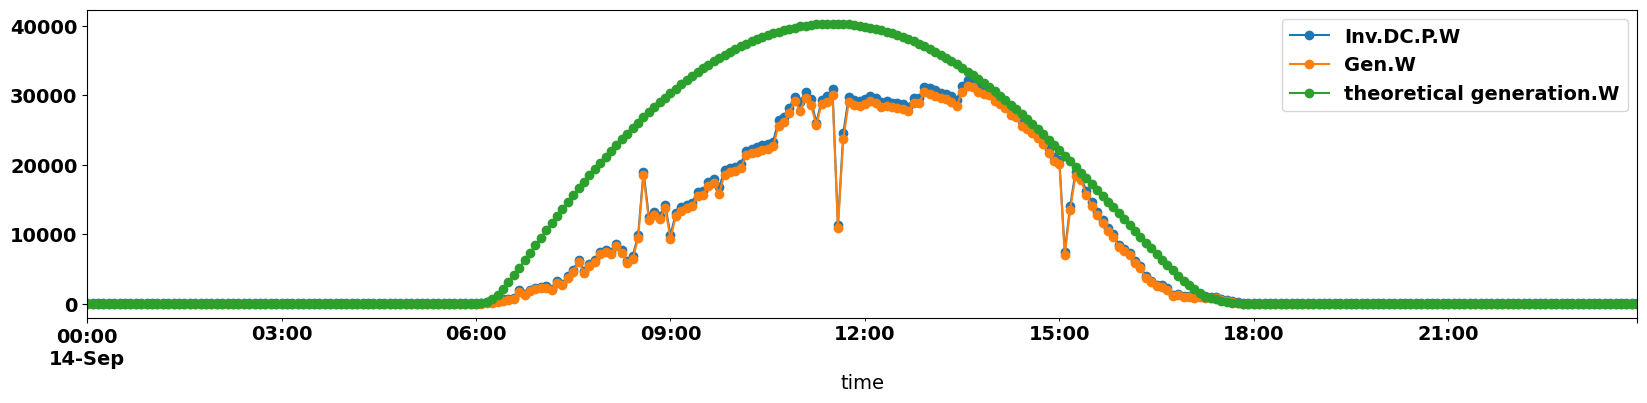

In [184]:
df_clearsky[df_clearsky['date']=='2022-09-14'].set_index('time')[['Inv.DC.P.W', 'Gen.W', 'theoretical generation.W']].plot(figsize=(20, 4), marker='o')


In [185]:
# count consective minute-underperformance in each day (at least half an hour)
df_shading_hour = pd.DataFrame(columns=['time', 'date', 'hour', 'minute', 'num_hour'])
date_list = df_clearsky['date'].unique()
number_hour_id = 0
for date_id in date_list[0:1]:
    date_id = date_list[0]
    df_date = df_clearsky[df_clearsky['date']==date_id]
    df_date = underperformance_count(df=df_date)
    df_date.index = np.arange(len(df_date))
    df_underhour = df_date[df_date['countUnder']==threshold_underperformance_hours]
    if len(df_underhour)>0:
        for hour_dex in df_underhour.index:
            start_index = hour_dex-threshold_underperformance_hours+1
            df_zero = df_date.iloc[hour_dex:, :]['countUnder'].eq(0)
            end_index = df_zero[df_zero==True].index[0]
            for i in range(start_index, end_index):
                time_id = df_date['time'].iloc[i].values[0]
                hour_id = df_date['hour'].iloc[i].values[0]
                minute_id = df_date['minute'].iloc[i].values[0]
                df_shading_hour = df_shading_hour.append(pd.DataFrame({'time': [time_id], 'date': [date_id], 'hour':[hour_id], 'minute': [minute_id], 'num_hour': [number_hour_id]}))
            number_hour_id += 1
df_shading_hour.index = np.arange(len(df_shading_hour))
df_shading_hour

Empty DataFrame
Columns: [time, date, hour, minute, num_hour]
Index: []

In [186]:
# =================================================
# = find consecutive dates with shading
# =================================================
df_shading = pd.DataFrame(columns=['time', 'start_date', 'end_date', 'num'])
if len(df_shading_hour)>0:
    number_shading_count = 0
    number_list = df_shading_hour['num_hour'].unique()
    for number_id in number_list:
        date_id = df_shading_hour[df_shading_hour['num_hour']==number_id]['date'].values[0]
        hour_start = df_shading_hour[df_shading_hour['num_hour']==number_id]['hour'].values[0]
        hour_end = df_shading_hour[df_shading_hour['num_hour']==number_id]['hour'].values[-1]
        minute_start = df_shading_hour[df_shading_hour['num_hour']==number_id]['minute'].values[0]
        minute_end = df_shading_hour[df_shading_hour['num_hour']==number_id]['minute'].values[-1]
        df_clearsky_days = df_clearsky[(df_clearsky['date']>=date_id)]
        consective_count = 0
        for date_after in df_clearsky_days['date'].values:
            df_slice_date = df_clearsky_days[df_clearsky_days['date']==date_after]
            df_slice_hour = df_slice_date[(df_slice_date['hour']>=hour_start) & (df_slice_date['hour']<=hour_end)]
            df_slice = df_slice_hour[(df_slice_hour['minute']>=minute_start) & (df_slice_hour['minute']<=minute_end)]
            df_slice.index = np.arange(len(df_slice))
            if df_slice['shading'].sum() == len(df_slice): # all true
                consective_count += 1
                start_index = 0
                end_index = len(df_slice)
            else:
                df_slice['countConsecutive'] = underperformance_count(df_slice)
                if len(df_slice[df_slice['countConsecutive']>=threshold_underperformance_hours])>0:
                    consective_count += 1
                    start_index = df_slice[df_slice['countConsecutive']==1].index
                    end_index = df_slice[df_slice['countConsecutive']==max(df_slice['countConsecutive'].values)].index
                    hour_start = df_slice['hour'].values[start_index]
                    hour_end = df_slice['hour'].values[end_index]
                    minute_start = df_slice['minute'].values[end_index]
                    minute_end = df_slice['minute'].values[end_index]
                
        if consective_count >= threshold_underperformance_days:
            df_shading_slice = df_slice['time'].iloc[start_index:end_index+1]
            df_shading_slice['start_date'] = date_id
            df_shading_slice['end_date'] = df_clearsky_days['date'].values[consective_count]
            df_shading_slice['num'] = number_shading_count

            df_shading = df_shading.append(df_shading_slice)
            
df_shading.index = np.arange(len(df_shading))
df_shading


Empty DataFrame
Columns: [time, start_date, end_date, num]
Index: []

In [187]:
for num_id in df_shading['num'].unique()[0:1]:
    df_num = df_shading[df_shading['num']==num_id]
    date_num_list = df_num['date'].values
    for date_id in date_num_list:
        df_plot = df_clearsky[df_clearsky['date']==date_id]
        fig, axe = plt.subplots(nrows=1, figsize=(20, 4))
        axe.plot(df_plot['time'], df_plot['Inv.DC.P.W'], label=date_id)
        sns.scatterplot(df_plot, x='time', y='Inv.DC.P.W', hue='current_decrease', palette={True: 'red', False: 'blue'}, markers='o', ax=axe)
        axe.legend()

In [188]:
df_clearsky.iloc[:, 0:12]

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  \
0           265.0        48.0       0     0  2022-07-30   
1           265.0        48.0       5     0  2022-07-30   
2           265.0        48.0      10     0  2022-07-30   
3           265.0        48.0      15     0  2022-07-30   
4           265.0        48.0      20     0  2022-07-30   
...           ...         ...     ...   ...         ...   
27355       335.0        45.0      35    23  2023-02-27   
27356       335.0        45.0      40    23  2023-02-27   
27357       335.0        45.0      45    23  2023-02-27   
27358       335.0        45.0      50    23  2023-02-27   
27359       335.0        45.0      55    23  2023-02-27   

       theoretical generation.W               sunrise_time_1h  
0                           0.0 2022-07-30 07:56:25.757585408  
1                           0.0 2022-07-30 07:56:25.757585408  
2                           0.0 2022-07-30 07:56:25.757585408  
3                           0.0 2022-07-30 07:56:25.757585408  
4                           0.0 2022-07-30 07:56:25.757585408  
...                         ...                           ...  
27355                       0.0 2023-02-27 07:46:40.008279808  
27356                       0.0 2023-02-27 07:46:40.008279808  
27357                       0.0 2023-02-27 07:46:40.008279808  
27358                       0.0 2023-02-27 07:46:40.008279808  
27359                       0.0 2023-02-27 07:46:40.008279808  

[27360 rows x 12 columns]

## 6.3 Labelling the Shading with clear-sky model

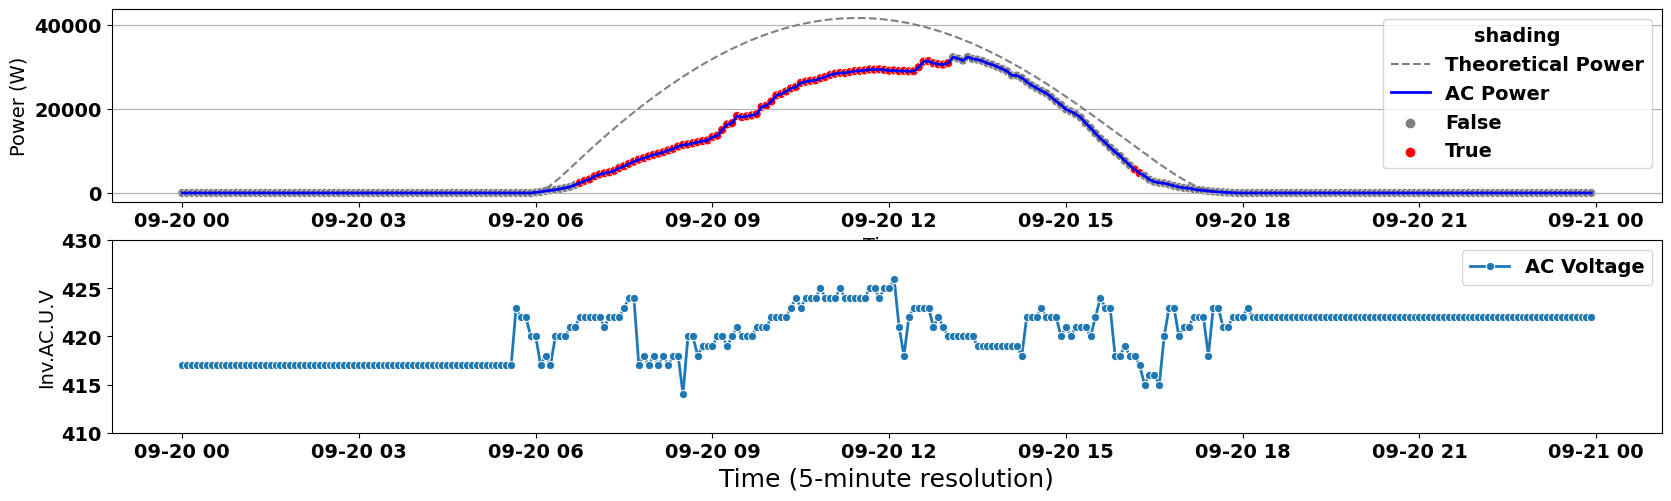

In [189]:
def plot_simple_results(df, pvsize):
    df_plot = df[df['date'] == '2022-09-20'].copy()
    df_plot['diff_shading'] = df_plot['theoretical generation.W'] - df_plot['Gen.W']
    df_plot['shading'] = df_plot['diff_shading']>0.1*pvsize
    fig, axe = plt.subplots(nrows=2, figsize=(20, 5.5))
    # #==== plot AC power
    sns.lineplot(df_plot, x='time', y='theoretical generation.W', legend='brief', label='Theoretical Power',
                    ax=axe[0], linestyle='dashed', color='gray')
    sns.lineplot(df_plot, x='time', y='Gen.W', legend='brief', label='AC Power',
                    ax=axe[0], color='blue', linewidth=2)
    sns.scatterplot(df_plot, x='time', y='Gen.W', hue='shading',
                    palette={True: 'red', False: 'gray'}, s=42, ax=axe[0])
    axe[0].set_ylabel('Power (W)')
    # axes[0].legend(loc=2, fontsize=font_size_value)
    axe[0].set_xlabel('Time')
    axe[0].grid(axis='y')

    # # === plot zoom-in AC voltage
    sns.lineplot(df_plot, x='time', y='Inv.AC.U.V', legend='brief', label='AC Voltage',
                    ax=axe[1], linewidth=2, marker='o')
    if df_plot['Inv.AC.U.V'].max() > 300:
        axe[1].set_ylim(410, 430)
    else:
        axe[1].set_ylim(240, 260)

    # # # === plot the frequency
    # sns.lineplot(df_plot, x='time', y='Inv.AC.Freq.Hz', legend='brief', label='AC Frequency', marker='o',
    #                 ax=axe[2], linewidth=2, color='black')
    axe[1].set_xlabel('Time (5-minute resolution)', fontsize=18)
    # plt.savefig('a_shading.pdf')
    plt.show()

plot_simple_results(df=df_clearsky, pvsize=pv_size)

In [190]:
threshold_offset_shading = 0.2

In [191]:
# difference between DC generation and the theoretical clear-sky generation
df_clearsky['DC_delta_Theorectical'] = (df_clearsky['theoretical generation.W']-df_clearsky['Inv.DC.P.W'])/pv_size
df_clearsky['DC_delta_Theorectical'] = df_clearsky['DC_delta_Theorectical'].replace(np.inf, 0)
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  \
0           265.0        48.0       0     0  2022-07-30  ...   
1           265.0        48.0       5     0  2022-07-30  ...   
2           265.0        48.0      10     0  2022-07-30  ...   
3           265.0        48.0      15     0  2022-07-30  ...   
4           265.0        48.0      20     0  2022-07-30  ...   
...           ...         ...     ...   ...         ...  ...   
27355       335.0        45.0      35    23  2023-02-27  ...   
27356       335.0        45.0      40    23  2023-02-27  ...   
27357       335.0        45.0      45    23  2023-02-27  ...   
27358       335.0        45.0      50    23  2023-02-27  ...   
27359       335.0        45.0      55    23  2023-02-27  ...   

       during_sunrise_set DC Zero Generation RIAvg  comparative_RIAvg  \
0                   False              False   NaN                NaN   
1                   False              False   NaN                NaN   
2                   False              False   1.0                0.0   
3                   False              False   1.0                0.0   
4                   False              False   1.0                0.0   
...                   ...                ...   ...                ...   
27355               False              False   1.0                0.0   
27356               False              False   1.0                0.0   
27357               False              False   1.0                0.0   
27358               False              False   1.0                0.0   
27359               False              False   1.0                0.0   

       current_decrease  RVAvg  comparative_RVAvg  voltage_decrease  shading  \
0                 False    NaN                NaN             False    False   
1                 False    NaN                NaN             False    False   
2                 False  265.0                0.0             False    False   
3                 False  265.0                0.0             False    False   
4                 False  265.0                0.0             False    False   
...                 ...    ...                ...               ...      ...   
27355             False  335.0                0.0             False    False   
27356             False  335.0                0.0             False    False   
27357             False  335.0                0.0             False    False   
27358             False  335.0                0.0             False    False   
27359             False  335.0                0.0             False    False   

       DC_delta_Theorectical  
0                  -0.000877  
1                  -0.000877  
2                  -0.000877  
3                  -0.000877  
4                  -0.000877  
...                      ...  
27355              -0.000822  
27356              -0.000822  
27357              -0.000822  
27358              -0.000822  
27359              -0.000822  

[27360 rows x 23 columns]

In [192]:
df_clearsky['offset_shading'] = df_clearsky['DC_delta_Theorectical']>=threshold_offset_shading
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  \
0           265.0        48.0       0     0  2022-07-30  ...   
1           265.0        48.0       5     0  2022-07-30  ...   
2           265.0        48.0      10     0  2022-07-30  ...   
3           265.0        48.0      15     0  2022-07-30  ...   
4           265.0        48.0      20     0  2022-07-30  ...   
...           ...         ...     ...   ...         ...  ...   
27355       335.0        45.0      35    23  2023-02-27  ...   
27356       335.0        45.0      40    23  2023-02-27  ...   
27357       335.0        45.0      45    23  2023-02-27  ...   
27358       335.0        45.0      50    23  2023-02-27  ...   
27359       335.0        45.0      55    23  2023-02-27  ...   

       DC Zero Generation RIAvg comparative_RIAvg  current_decrease  RVAvg  \
0                   False   NaN               NaN             False    NaN   
1                   False   NaN               NaN             False    NaN   
2                   False   1.0               0.0             False  265.0   
3                   False   1.0               0.0             False  265.0   
4                   False   1.0               0.0             False  265.0   
...                   ...   ...               ...               ...    ...   
27355               False   1.0               0.0             False  335.0   
27356               False   1.0               0.0             False  335.0   
27357               False   1.0               0.0             False  335.0   
27358               False   1.0               0.0             False  335.0   
27359               False   1.0               0.0             False  335.0   

       comparative_RVAvg  voltage_decrease  shading  DC_delta_Theorectical  \
0                    NaN             False    False              -0.000877   
1                    NaN             False    False              -0.000877   
2                    0.0             False    False              -0.000877   
3                    0.0             False    False              -0.000877   
4                    0.0             False    False              -0.000877   
...                  ...               ...      ...                    ...   
27355                0.0             False    False              -0.000822   
27356                0.0             False    False              -0.000822   
27357                0.0             False    False              -0.000822   
27358                0.0             False    False              -0.000822   
27359                0.0             False    False              -0.000822   

       offset_shading  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
27355           False  
27356           False  
27357           False  
27358           False  
27359           False  

[27360 rows x 24 columns]

In [193]:
def consective_count(df, col_name, result_name):
    df[result_name] = np.nan
    ix = pd.Series(range(df.shape[0])).where((~df[col_name]).values, np.nan).ffill().values
    notna = pd.notna(ix)
    df[result_name] = df[notna].groupby(ix[notna]).cumcount()
    return df

In [194]:
# consective shading each day
df_clearsky = consective_count(df_clearsky, col_name='offset_shading', result_name='countOffset')
df_clearsky[df_clearsky['countOffset']>=threshold_underperformance_hours]

time  Inv.AC.U.V  Inv.AC.I.A    Gen.W  Inv.AC.Freq.Hz  \
103   2022-07-30 08:35:00       415.0         6.0   3975.0            50.0   
104   2022-07-30 08:40:00       420.0         6.0   4299.0            50.0   
105   2022-07-30 08:45:00       422.0         6.0   4420.0            50.0   
106   2022-07-30 08:50:00       422.0         7.0   4966.0            50.0   
107   2022-07-30 08:55:00       421.0         8.0   6074.0            50.0   
...                   ...         ...         ...      ...             ...   
27223 2023-02-27 12:35:00       418.0        43.0  30847.0            50.0   
27224 2023-02-27 12:40:00       416.0        45.0  32318.0            50.0   
27225 2023-02-27 12:45:00       417.0        45.0  32618.0            50.0   
27226 2023-02-27 12:50:00       417.0        47.0  33726.0            50.0   
27227 2023-02-27 12:55:00       418.0        48.0  34812.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...      RIAvg  \
103         595.0      4250.0      35     8  2022-07-30  ...   5.000000   
104         603.0      4555.0      40     8  2022-07-30  ...   5.666667   
105         593.0      4729.0      45     8  2022-07-30  ...   6.000000   
106         587.0      5240.0      50     8  2022-07-30  ...   6.333333   
107         589.0      6428.0      55     8  2022-07-30  ...   7.000000   
...           ...         ...     ...   ...         ...  ...        ...   
27223       552.0     31756.0      35    12  2023-02-27  ...  42.333333   
27224       549.0     33319.0      40    12  2023-02-27  ...  43.333333   
27225       550.0     33573.0      45    12  2023-02-27  ...  44.333333   
27226       558.0     34662.0      50    12  2023-02-27  ...  45.666667   
27227       560.0     35782.0      55    12  2023-02-27  ...  46.666667   

      comparative_RIAvg current_decrease       RVAvg  comparative_RVAvg  \
103            1.000000            False  556.000000          39.000000   
104            0.333333            False  583.000000          20.000000   
105            0.000000            False  597.000000          -4.000000   
106            0.666667            False  594.333333          -7.333333   
107            1.000000            False  589.666667          -0.666667   
...                 ...              ...         ...                ...   
27223          0.666667            False  555.333333          -3.333333   
27224          1.666667            False  552.666667          -3.666667   
27225          0.666667            False  550.333333          -0.333333   
27226          1.333333            False  552.333333           5.666667   
27227          1.333333            False  556.000000           4.000000   

       voltage_decrease  shading  DC_delta_Theorectical  offset_shading  \
103               False    False               0.217397            True   
104               False    False               0.225802            True   
105               False    False               0.236231            True   
106               False    False               0.240131            True   
107               False    False               0.231292            True   
...                 ...      ...                    ...             ...   
27223             False    False               0.274044            True   
27224             False    False               0.246187            True   
27225             False    False               0.241828            True   
27226             False    False               0.221785            True   
27227             False    False               0.200753            True   

       countOffset  
103              4  
104              5  
105              6  
106              7  
107              8  
...            ...  
27223           38  
27224           39  
27225           40  
27226           41  
27227           42  

[3219 rows x 25 columns]

In [195]:
df_clearsky['time_minute'] = df_clearsky['time'].astype(str).str.split(' ').str[1]
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  \
0           265.0        48.0       0     0  2022-07-30  ...   
1           265.0        48.0       5     0  2022-07-30  ...   
2           265.0        48.0      10     0  2022-07-30  ...   
3           265.0        48.0      15     0  2022-07-30  ...   
4           265.0        48.0      20     0  2022-07-30  ...   
...           ...         ...     ...   ...         ...  ...   
27355       335.0        45.0      35    23  2023-02-27  ...   
27356       335.0        45.0      40    23  2023-02-27  ...   
27357       335.0        45.0      45    23  2023-02-27  ...   
27358       335.0        45.0      50    23  2023-02-27  ...   
27359       335.0        45.0      55    23  2023-02-27  ...   

       comparative_RIAvg current_decrease  RVAvg  comparative_RVAvg  \
0                    NaN            False    NaN                NaN   
1                    NaN            False    NaN                NaN   
2                    0.0            False  265.0                0.0   
3                    0.0            False  265.0                0.0   
4                    0.0            False  265.0                0.0   
...                  ...              ...    ...                ...   
27355                0.0            False  335.0                0.0   
27356                0.0            False  335.0                0.0   
27357                0.0            False  335.0                0.0   
27358                0.0            False  335.0                0.0   
27359                0.0            False  335.0                0.0   

       voltage_decrease  shading  DC_delta_Theorectical  offset_shading  \
0                 False    False              -0.000877           False   
1                 False    False              -0.000877           False   
2                 False    False              -0.000877           False   
3                 False    False              -0.000877           False   
4                 False    False              -0.000877           False   
...                 ...      ...                    ...             ...   
27355             False    False              -0.000822           False   
27356             False    False              -0.000822           False   
27357             False    False              -0.000822           False   
27358             False    False              -0.000822           False   
27359             False    False              -0.000822           False   

       countOffset  time_minute  
0                0     00:00:00  
1                0     00:05:00  
2                0     00:10:00  
3                0     00:15:00  
4                0     00:20:00  
...            ...          ...  
27355            0     23:35:00  
27356            0     23:40:00  
27357            0     23:45:00  
27358            0     23:50:00  
27359            0     23:55:00  

[27360 rows x 26 columns]

In [196]:
# =================================================
# = find consecutive minutes in each day with shading
# =================================================
shading_daily_list = df_clearsky.loc[df_clearsky['countOffset']>=threshold_underperformance_hours, 'date'].unique()
df_shading_daily = pd.DataFrame(columns=['date', 'start_time', 'end_time', 'Cnum'])
for date_id in shading_daily_list:
# date_id = shading_daily_list[0]
    df_date_slice = df_clearsky[df_clearsky['date']==date_id]
    df_date_slice.index = np.arange(len(df_date_slice))
    df_shading_slice = df_date_slice[df_date_slice['countOffset']==threshold_underperformance_hours]
    for i in range(len(df_shading_slice)):
        # time_minute = df_shading_slice['time_minute'].values[i]
        start_index = df_shading_slice.index[i] - threshold_underperformance_hours + 1
        df_zero = df_date_slice.iloc[start_index:, :]['countOffset'].eq(0)
        end_index = df_zero[df_zero==True].index[0]
        time_minute_start = df_date_slice['time_minute'].values[start_index]
        time_minute_end = df_date_slice['time_minute'].values[end_index-1]
        df_shading_daily = df_shading_daily.append(pd.DataFrame({'date': [date_id], 'start_time': [time_minute_start], 'end_time': [time_minute_end], 'Cnum': [end_index-start_index]}))
        
df_shading_daily.index = np.arange(len(df_shading_daily))
df_shading_daily


date start_time  end_time Cnum
0    2022-07-30   08:20:00  12:55:00   56
1    2022-08-01   08:20:00  08:40:00    5
2    2022-08-01   08:50:00  10:00:00   15
3    2022-08-01   10:10:00  11:20:00   15
4    2022-08-01   11:35:00  12:10:00    8
..          ...        ...       ...  ...
290  2023-02-20   08:35:00  13:00:00   54
291  2023-02-20   16:05:00  16:25:00    5
292  2023-02-25   08:20:00  13:00:00   57
293  2023-02-27   08:20:00  09:20:00   13
294  2023-02-27   09:30:00  12:55:00   42

[295 rows x 4 columns]

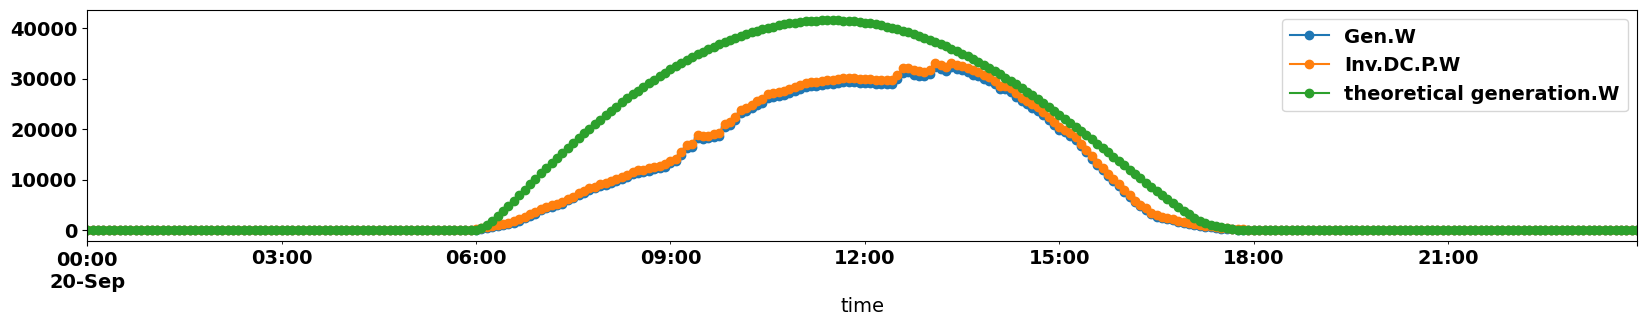

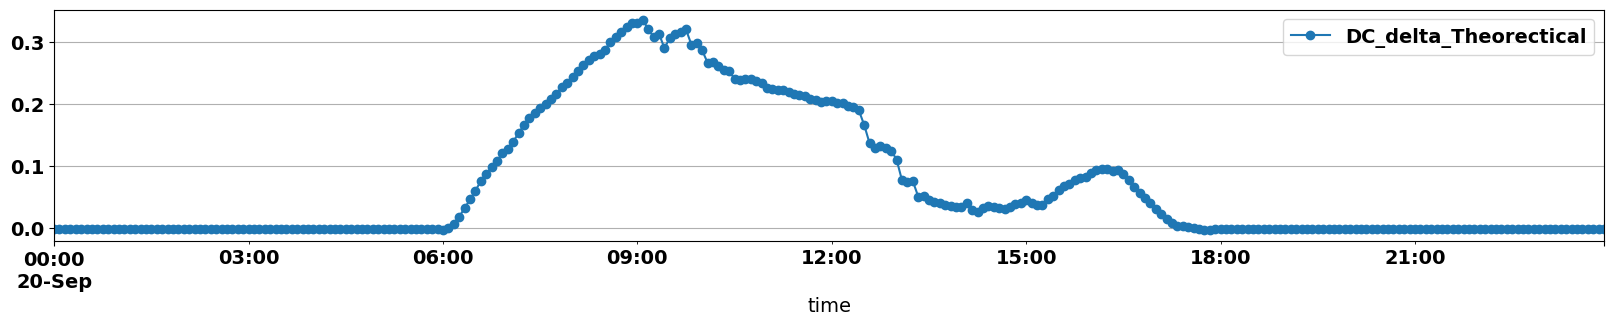

In [197]:
df_clearsky[df_clearsky['date']=='2022-09-20'].set_index('time')[['Gen.W', 'Inv.DC.P.W', 'theoretical generation.W']].plot(figsize=(20, 3), marker='o')
df_clearsky[df_clearsky['date']=='2022-09-20'].set_index('time')[['DC_delta_Theorectical']].plot(figsize=(20, 3), marker='o')
plt.grid('y')

## 6.4 Labelling the Clipping

In [198]:
# parameter
threshold_clipping = 1.15
middle_day_start = 11
middel_day_end = 15

In [199]:
# ===========================================================
# = Normal: DC power is much higher than AC power == 1.05
# = Clipping: DC power/AC Power >>1.3 & DC power > 30
# ===========================================================

df_clipping = df_clearsky.copy()
df_clipping = df_clipping[(df_clipping['hour']>=middle_day_start) & (df_clipping['hour']<=middel_day_end)]
df_clipping['DCP_over_ACP'] = df_clipping['Inv.DC.P.W']/df_clipping['Gen.W']
df_clipping['DCP_over_ACP'] = df_clipping['DCP_over_ACP'].replace(np.inf, 0)
df_clipping[(df_clipping['DCP_over_ACP']>=threshold_clipping)].head()

time  Inv.AC.U.V  Inv.AC.I.A    Gen.W  Inv.AC.Freq.Hz  \
431  2022-08-01 11:55:00       423.0        10.0   7291.0            50.0   
438  2022-08-01 12:30:00       422.0        17.0  12638.0            50.0   
2200 2022-08-16 15:20:00       413.0         5.0   3558.0            50.0   
3071 2022-08-24 15:55:00       419.0         4.0   2424.0            50.0   
5332 2022-09-16 12:20:00       421.0        19.0  16328.0            50.0   

      Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  current_decrease  \
431        647.0      8927.0      55    11  2022-08-01  ...             False   
438        606.0     16274.0      30    12  2022-08-01  ...             False   
2200       548.0      4296.0      20    15  2022-08-16  ...             False   
3071       585.0      2856.0      55    15  2022-08-24  ...             False   
5332       646.0     28926.0      20    12  2022-09-16  ...             False   

           RVAvg comparative_RVAvg  voltage_decrease  shading  \
431   654.000000         -7.000000             False    False   
438   636.333333        -30.333333              True    False   
2200  550.333333         -2.333333             False    False   
3071  578.000000          7.000000             False    False   
5332  643.333333          2.666667             False    False   

      DC_delta_Theorectical  offset_shading  countOffset  time_minute  \
431                0.404675            True            5     11:55:00   
438                0.253456            True            3     12:30:00   
2200               0.195655           False            0     15:20:00   
3071               0.140263           False            0     15:55:00   
5332               0.194329           False            0     12:20:00   

      DCP_over_ACP  
431       1.224386  
438       1.287704  
2200      1.207420  
3071      1.178218  
5332      1.771558  

[5 rows x 27 columns]

In [200]:
window_size_dcclipp = 1 # days
threshold_performance_dcclipp_upper = 0.002
threshold_performance_dcclipp_lower = -0.002
threshold_dcclipp_time = 5 # time slots # 25 minutes
sun_thre_stard = 10 # 10 am
sun_thred_end = 15 # 15 pm

In [201]:
df_clearsky['dcP_diff'] = df_clearsky['Inv.DC.P.W'].diff()/pv_size


In [202]:
df_dcclipping = df_clearsky.copy()
# select concerned sunny time based on threshold values
df_dcclipping = df_dcclipping[(df_dcclipping['hour']>=sun_thre_stard) & (df_dcclipping['hour']<=sun_thred_end)]
# identify the potential clipping
df_dcclipping['potential_dcclip'] = (df_dcclipping['dcP_diff']<=threshold_performance_dcclipp_upper) & (df_dcclipping['dcP_diff']>=threshold_performance_dcclipp_lower)
# df_dcclipping[df_dcclipping['dcclip_performance']==True]
df_dcclipping['clipping_period'] = df_dcclipping['potential_dcclip'].diff().ne(0).cumsum()
df_dcclipping['clipping_duration'] = df_dcclipping.groupby('clipping_period')['potential_dcclip'].transform('sum')
df_dcclipping['is_clipping_period'] = df_dcclipping['potential_dcclip'] & (df_dcclipping['clipping_duration']>=threshold_dcclipp_time)
df_dcclipping

time  Inv.AC.U.V  Inv.AC.I.A    Gen.W  Inv.AC.Freq.Hz  \
120   2022-07-30 10:00:00       422.0        13.0   9688.0            50.0   
121   2022-07-30 10:05:00       423.0        14.0   9917.0            50.0   
122   2022-07-30 10:10:00       421.0        14.0  10092.0            50.0   
123   2022-07-30 10:15:00       422.0        14.0  10238.0            50.0   
124   2022-07-30 10:20:00       422.0        14.0  10403.0            50.0   
...                   ...         ...         ...      ...             ...   
27259 2023-02-27 15:35:00       421.0        42.0  30141.0            50.0   
27260 2023-02-27 15:40:00       422.0        41.0  29609.0            50.0   
27261 2023-02-27 15:45:00       423.0        40.0  28941.0            50.0   
27262 2023-02-27 15:50:00       421.0        37.0  26858.0            50.0   
27263 2023-02-27 15:55:00       423.0        36.0  26269.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  shading  \
120         591.0     10083.0       0    10  2022-07-30  ...    False   
121         600.0     10281.0       5    10  2022-07-30  ...    False   
122         599.0     10453.0      10    10  2022-07-30  ...    False   
123         599.0     10585.0      15    10  2022-07-30  ...    False   
124         596.0     10761.0      20    10  2022-07-30  ...    False   
...           ...         ...     ...   ...         ...  ...      ...   
27259       560.0     30988.0      35    15  2023-02-27  ...    False   
27260       561.0     30415.0      40    15  2023-02-27  ...    False   
27261       572.0     29696.0      45    15  2023-02-27  ...    False   
27262       582.0     27566.0      50    15  2023-02-27  ...    False   
27263       584.0     26989.0      55    15  2023-02-27  ...    False   

      DC_delta_Theorectical offset_shading  countOffset  time_minute  \
120                0.298383           True           21     10:00:00   
121                0.302456           True           22     10:05:00   
122                0.306623           True           23     10:10:00   
123                0.311141           True           24     10:15:00   
124                0.314471           True           25     10:20:00   
...                     ...            ...          ...          ...   
27259              0.061321          False            0     15:35:00   
27260              0.058959          False            0     15:40:00   
27261              0.058988          False            0     15:45:00   
27262              0.084533          False            0     15:50:00   
27263              0.081436          False            0     15:55:00   

       dcP_diff  potential_dcclip  clipping_period  clipping_duration  \
120    0.004952             False                1                  0   
121    0.003618             False                1                  0   
122    0.003143             False                1                  0   
123    0.002412             False                1                  0   
124    0.003216             False                1                  0   
...         ...               ...              ...                ...   
27259 -0.011806             False              923                  0   
27260 -0.010471             False              923                  0   
27261 -0.013140             False              923                  0   
27262 -0.038925             False              923                  0   
27263 -0.010545             False              923                  0   

       is_clipping_period  
120                 False  
121                 False  
122                 False  
123                 False  
124                 False  
...                   ...  
27259               False  
27260               False  
27261               False  
27262               False  
27263               False  

[6840 rows x 31 columns]

In [203]:
df_clearsky['is_clipping_period'] = False
df_clearsky['is_clipping_period'] = df_clearsky['time'].map(df_dcclipping.set_index('time')['is_clipping_period'])
df_clearsky

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0     2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1     2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2     2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3     2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4     2022-07-30 00:20:00       418.0         1.0    0.0            50.0   
...                   ...         ...         ...    ...             ...   
27355 2023-02-27 23:35:00       420.0         1.0    0.0            50.0   
27356 2023-02-27 23:40:00       420.0         1.0    0.0            50.0   
27357 2023-02-27 23:45:00       420.0         1.0    0.0            50.0   
27358 2023-02-27 23:50:00       420.0         1.0    0.0            50.0   
27359 2023-02-27 23:55:00       420.0         1.0    0.0            50.0   

       Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  RVAvg  \
0           265.0        48.0       0     0  2022-07-30  ...    NaN   
1           265.0        48.0       5     0  2022-07-30  ...    NaN   
2           265.0        48.0      10     0  2022-07-30  ...  265.0   
3           265.0        48.0      15     0  2022-07-30  ...  265.0   
4           265.0        48.0      20     0  2022-07-30  ...  265.0   
...           ...         ...     ...   ...         ...  ...    ...   
27355       335.0        45.0      35    23  2023-02-27  ...  335.0   
27356       335.0        45.0      40    23  2023-02-27  ...  335.0   
27357       335.0        45.0      45    23  2023-02-27  ...  335.0   
27358       335.0        45.0      50    23  2023-02-27  ...  335.0   
27359       335.0        45.0      55    23  2023-02-27  ...  335.0   

      comparative_RVAvg voltage_decrease  shading  DC_delta_Theorectical  \
0                   NaN            False    False              -0.000877   
1                   NaN            False    False              -0.000877   
2                   0.0            False    False              -0.000877   
3                   0.0            False    False              -0.000877   
4                   0.0            False    False              -0.000877   
...                 ...              ...      ...                    ...   
27355               0.0            False    False              -0.000822   
27356               0.0            False    False              -0.000822   
27357               0.0            False    False              -0.000822   
27358               0.0            False    False              -0.000822   
27359               0.0            False    False              -0.000822   

       offset_shading  countOffset  time_minute  dcP_diff  is_clipping_period  
0               False            0     00:00:00       NaN                 NaN  
1               False            0     00:05:00       0.0                 NaN  
2               False            0     00:10:00       0.0                 NaN  
3               False            0     00:15:00       0.0                 NaN  
4               False            0     00:20:00       0.0                 NaN  
...               ...          ...          ...       ...                 ...  
27355           False            0     23:35:00       0.0                 NaN  
27356           False            0     23:40:00       0.0                 NaN  
27357           False            0     23:45:00       0.0                 NaN  
27358           False            0     23:50:00       0.0                 NaN  
27359           False            0     23:55:00       0.0                 NaN  

[27360 rows x 28 columns]

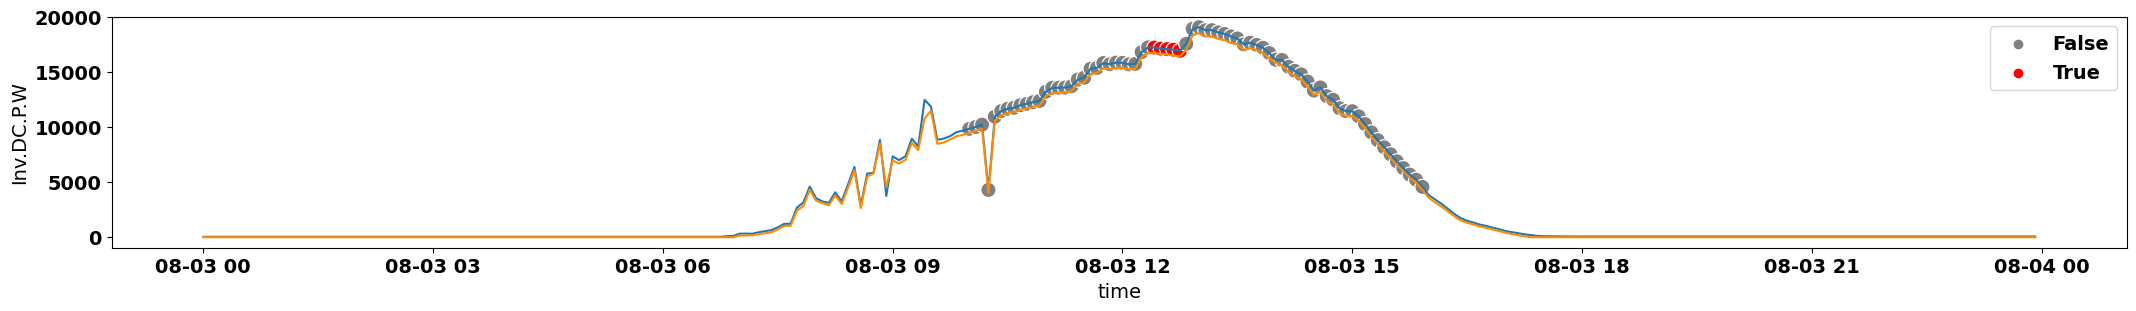

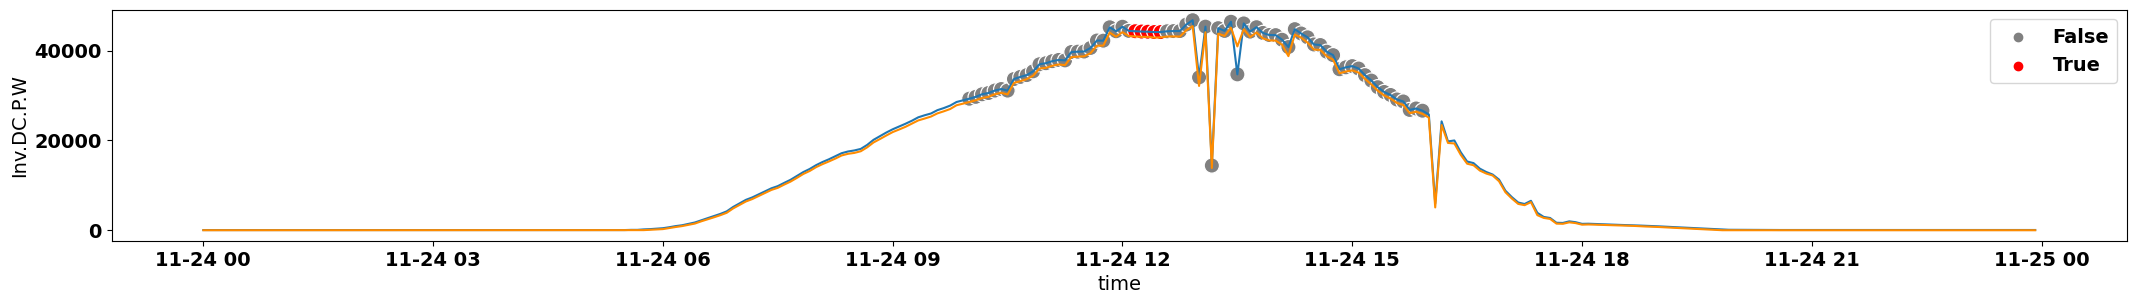

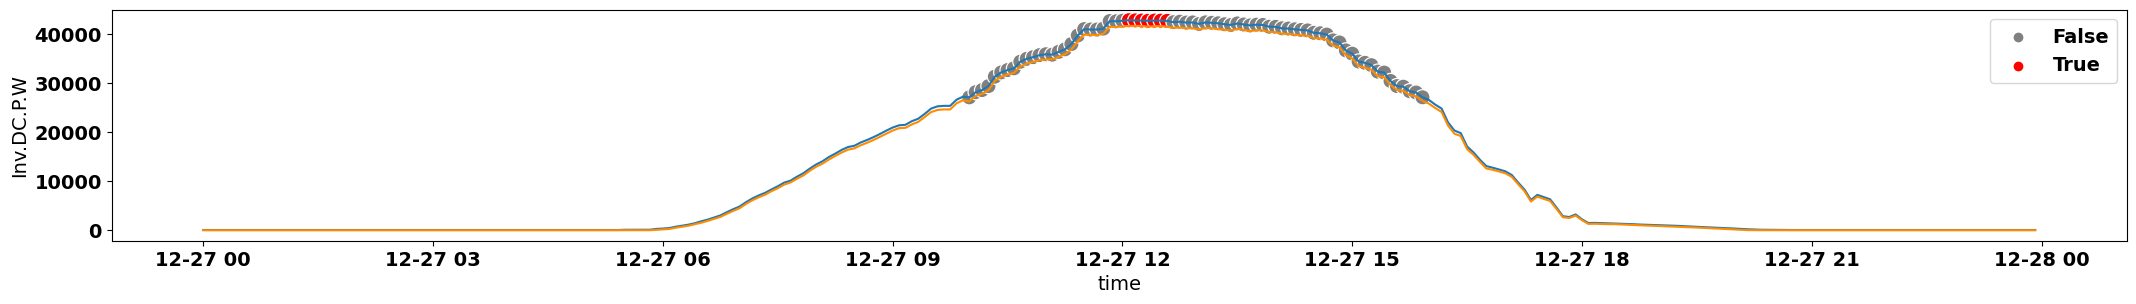

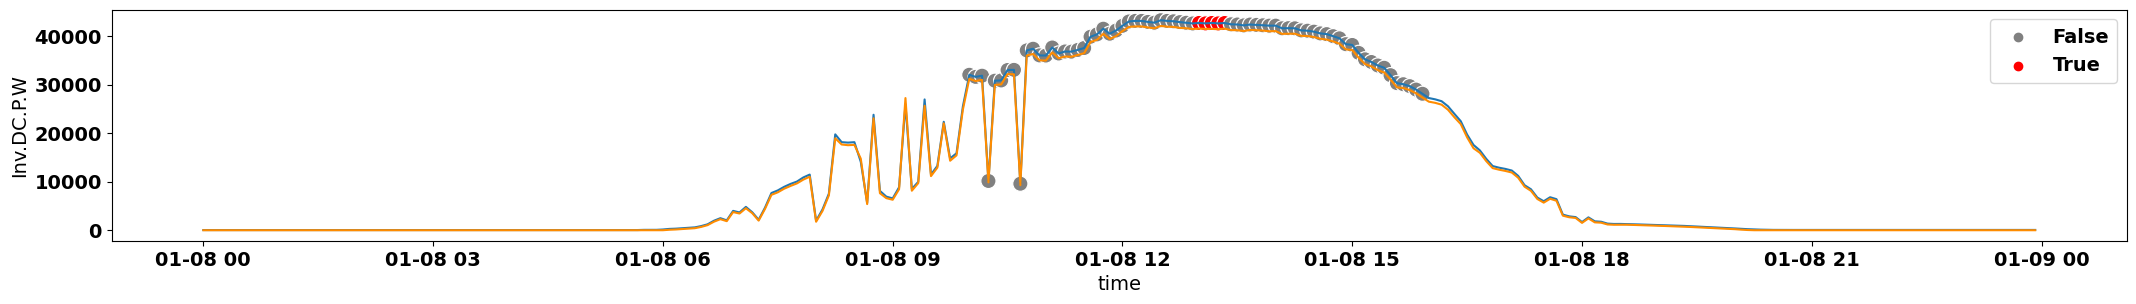

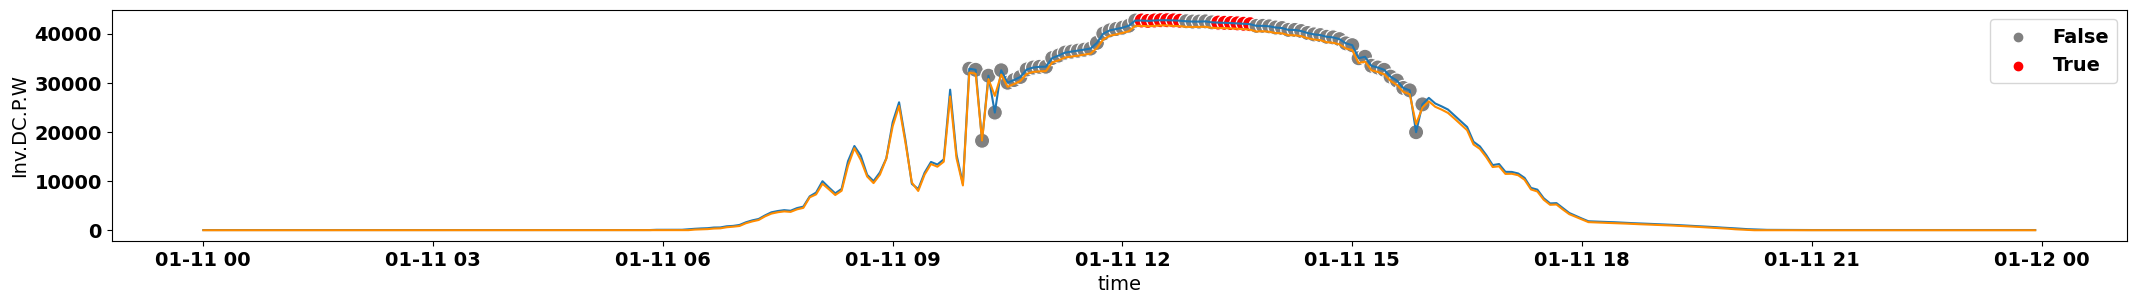

In [204]:
dcclipping_dates_list = df_dcclipping.loc[df_dcclipping['is_clipping_period']==True, 'date'].unique()
for date_id in dcclipping_dates_list:
    df_plot = df_clearsky[df_clearsky['date']==date_id]
    fig, axe = plt.subplots(nrows=1, figsize=(26, 3))
    sns.scatterplot(df_plot, x='time', y='Inv.DC.P.W', hue='is_clipping_period', palette={True: 'red', False: 'gray'}, markers='o',  s=120, ax=axe)
    axe.plot(df_plot['time'], df_plot['Inv.DC.P.W'])
    axe.plot(df_plot['time'], df_plot['Gen.W'], color='darkorange')
    axe.legend()
    plt.show()

# 7. High-Level Analysis

## 7.1 Analysis in each time slot

In [205]:
def get_season(df):
    seasons = {1: 'Summer', 2:'Summer', 3: 'Autumn', 4:'Autumn', 5: 'Autumn', 6: 'Winter', 7:'Winter', 8:'Winter', 9:'Spring', 10:'Spring', 11: 'Spring', 12: 'Summer'}
    df['season'] = df['time'].dt.month.map(seasons)
    return df

In [206]:
df_clearsky = get_season(df_clearsky)
df_clearsky['hour_minute'] = df_clearsky['hour'].astype(str).str.cat(df_clearsky['minute'].astype(str), sep=':')
df_clearsky.head()

time  Inv.AC.U.V  Inv.AC.I.A  Gen.W  Inv.AC.Freq.Hz  \
0 2022-07-30 00:00:00       418.0         1.0    0.0            50.0   
1 2022-07-30 00:05:00       418.0         1.0    0.0            50.0   
2 2022-07-30 00:10:00       418.0         1.0    0.0            50.0   
3 2022-07-30 00:15:00       418.0         1.0    0.0            50.0   
4 2022-07-30 00:20:00       418.0         1.0    0.0            50.0   

   Inv.DC.U.V  Inv.DC.P.W  minute  hour        date  ...  voltage_decrease  \
0       265.0        48.0       0     0  2022-07-30  ...             False   
1       265.0        48.0       5     0  2022-07-30  ...             False   
2       265.0        48.0      10     0  2022-07-30  ...             False   
3       265.0        48.0      15     0  2022-07-30  ...             False   
4       265.0        48.0      20     0  2022-07-30  ...             False   

  shading DC_delta_Theorectical  offset_shading  countOffset  time_minute  \
0   False             -0.000877           False            0     00:00:00   
1   False             -0.000877           False            0     00:05:00   
2   False             -0.000877           False            0     00:10:00   
3   False             -0.000877           False            0     00:15:00   
4   False             -0.000877           False            0     00:20:00   

   dcP_diff  is_clipping_period  season  hour_minute  
0       NaN                 NaN  Winter          0:0  
1       0.0                 NaN  Winter          0:5  
2       0.0                 NaN  Winter         0:10  
3       0.0                 NaN  Winter         0:15  
4       0.0                 NaN  Winter         0:20  

[5 rows x 30 columns]

Inv.AC.U.V
Inv.AC.I.A
Gen.W
Inv.AC.Freq.Hz
Inv.DC.U.V
Inv.DC.P.W


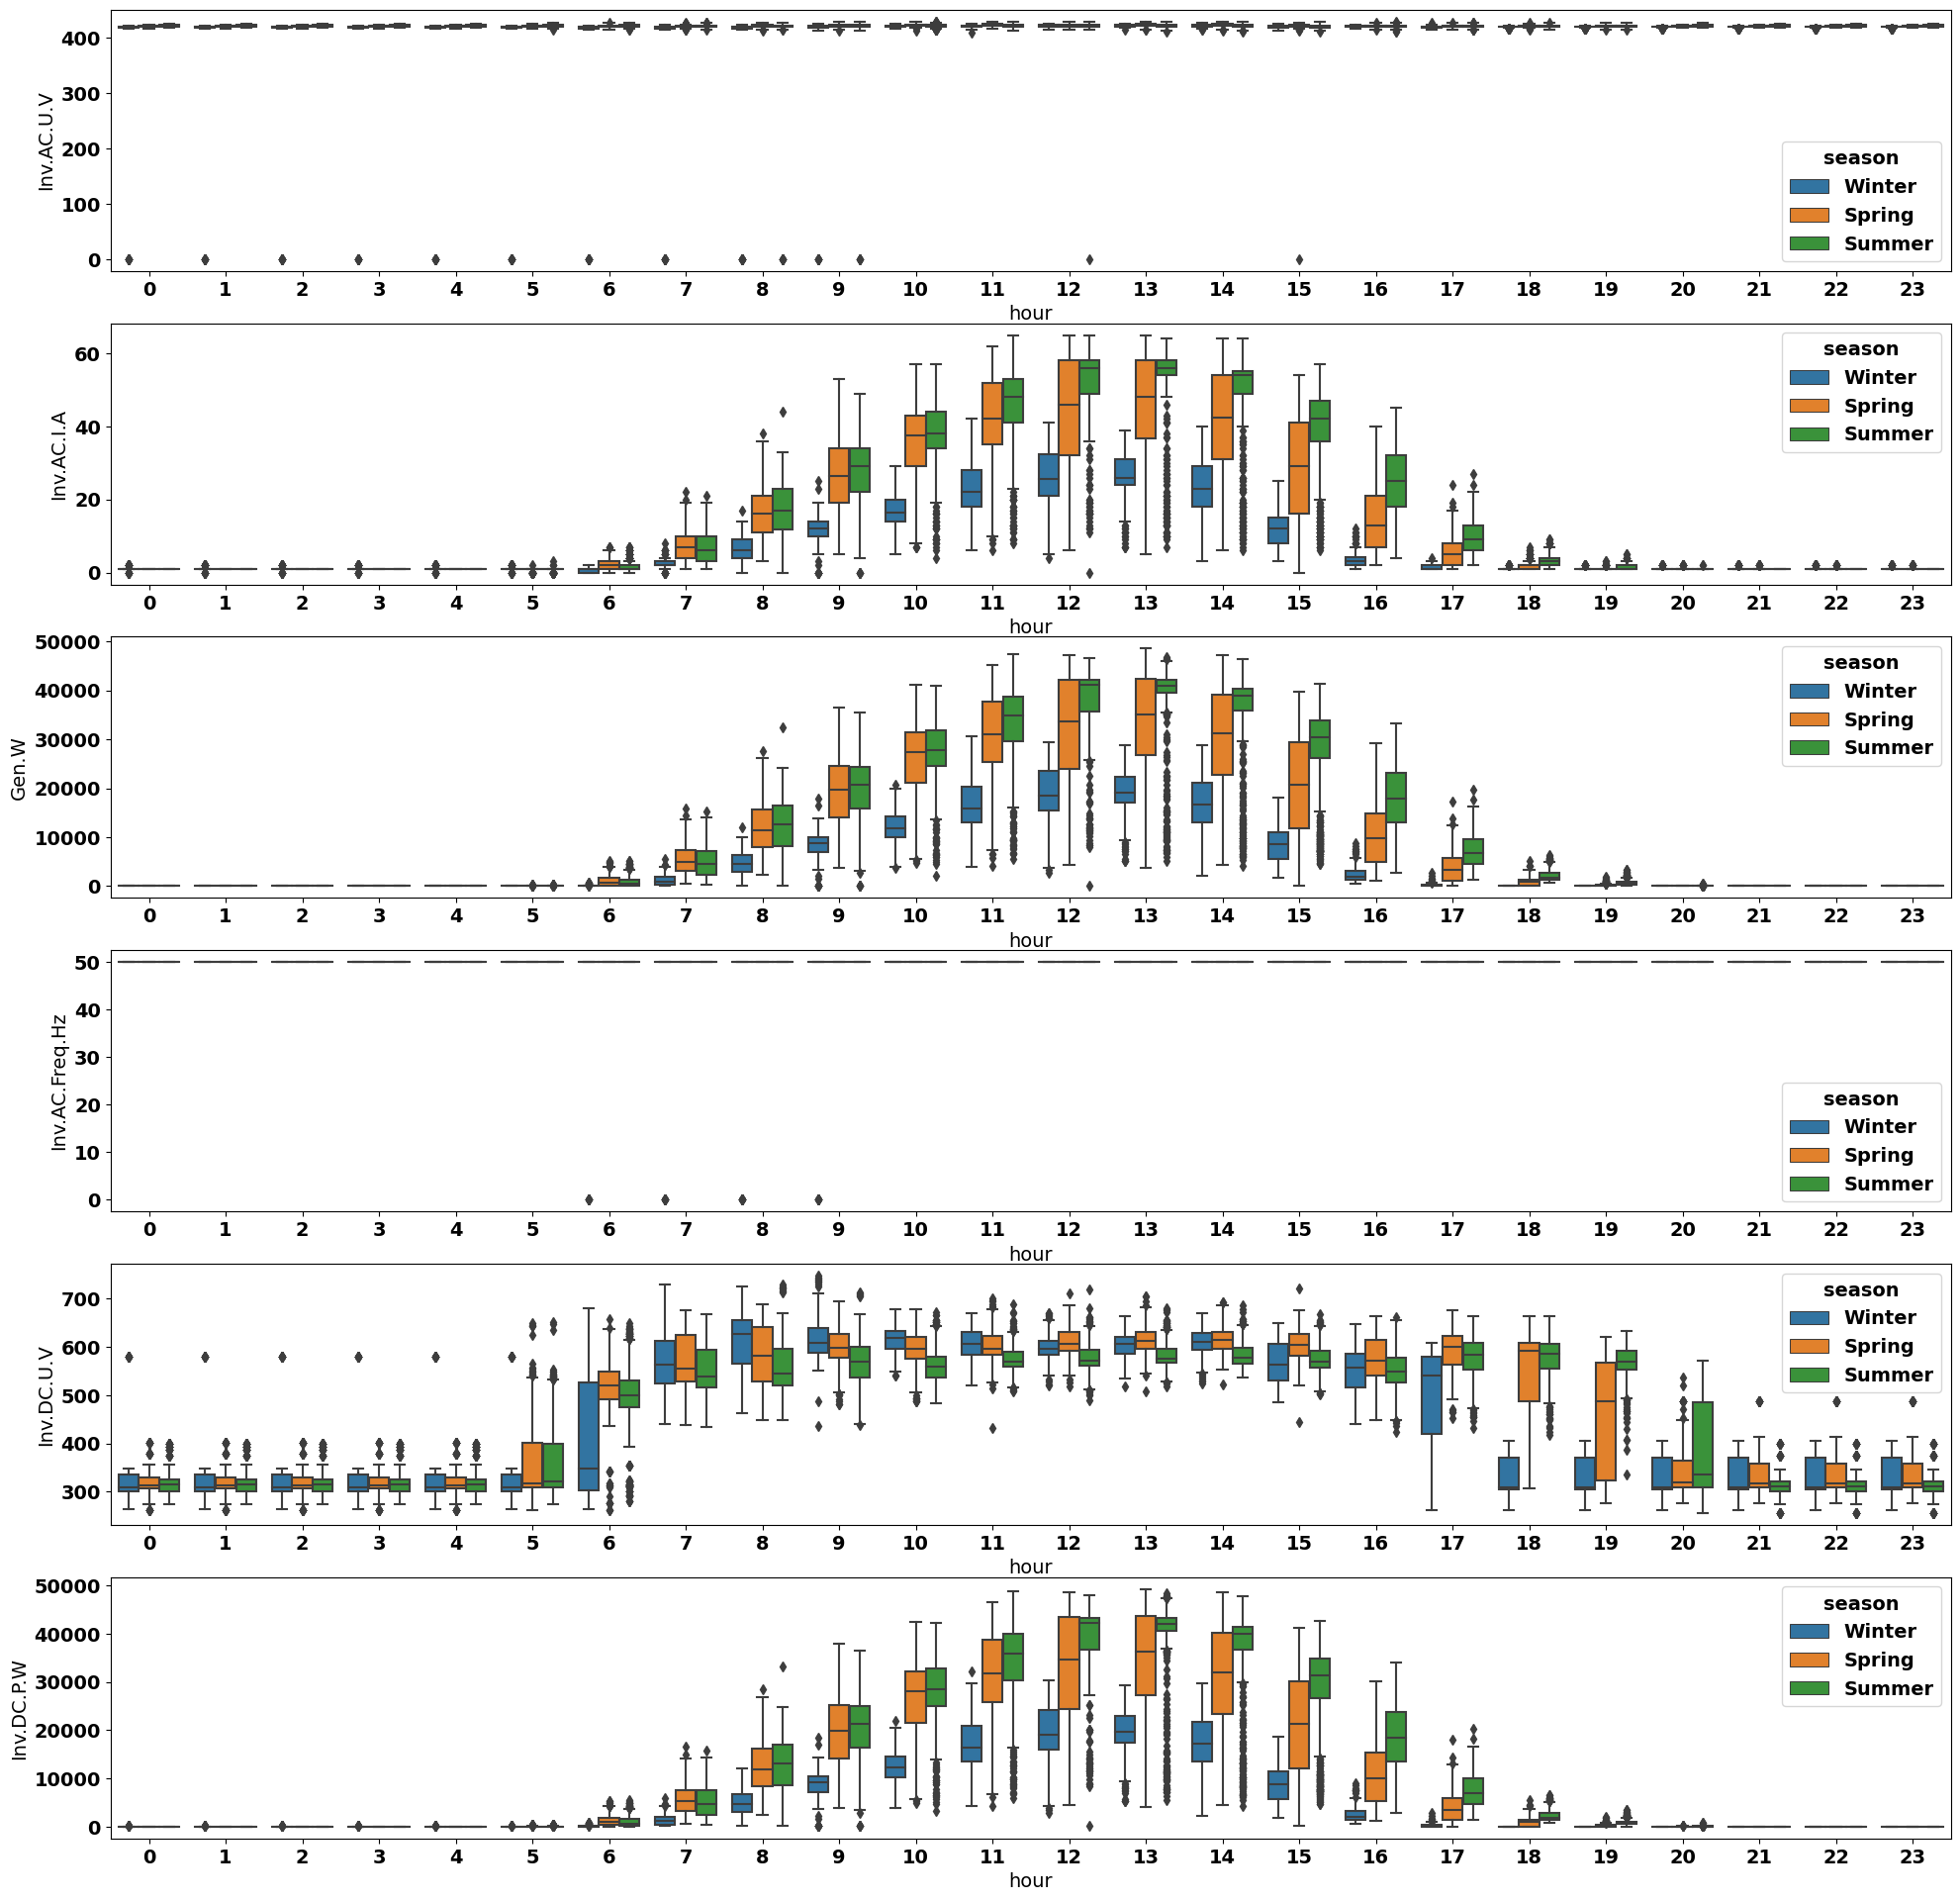

In [207]:
fig, axe = plt.subplots(nrows=len(metrics_list), figsize=(24, 4*len(metrics_list)))
for i, metric_name in enumerate(metrics_list):
    print(metric_name)
    sns.boxplot(data=df_clearsky, x="hour", y=metric_name, hue="season", ax=axe[i])